# Introduction

Kaggle: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data

**Giới thiệu**: 

The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

## Data Dictionary

| **Variable Name**          | **Role**    | **Type**        | **Description**                                          |
|----------------------------|-------------|-----------------|----------------------------------------------------------|
| Customer_ID                | Feature     | Integer   | A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time |
| Age                      | Feature     | Integer                      | The age of the customer, providing demographic information for segmentation and targeted marketing strategies                                   |
| Gender                   | Feature     | Categorical               | The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns               |
| Item_Purchased           | Feature     | Categorical                     | The specific product or item selected by the customer during the transaction                               |
| Category                 | Feature     | Categorical                      |The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries)                                        |
| Purchase_Amount_(USD)      | Feature     | Integer                         | The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s)                                   |
| Location                 | Feature     | Categorical            | The geographical location where the purchase was made, offering insights into regional preferences and market trends                                         |
| Size                     | Feature     | Categorical                     | The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods                                |
| Color                    | Feature     | Categorical                  | The color variant or choice associated with the purchased item, influencing customer preferences and product availability                                          |
| Season                   | Feature     | Categorical                     | The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies                      |
| Review_Rating            | Feature     | Float                  | A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item                      |
| Shipping_Type            | Feature     | Categorical                     | Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs              |
| Discount_Applied         | Feature     | Binary                          | Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness                       |
| Promo_Code_Used          | Feature     | Binary                          | Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success                 |
| Previous_Purchases       | Feature     | Integer                         | Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies                                     |
| Payment_Method           | Feature     | Categorical                    | Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options           |
| Frequency_Of_Purchases   | Feature     | Categorical                        | Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value    |
| Subscription_Status      | Target      | Binary                         | Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue (Yes/No)                      |


# Import Libaries

In [1305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.metrics import roc_curve, auc as sk_auc
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

## DataFrame

In [1306]:
df_shopping = pd.read_csv('./shopping_behavior_updated.csv')
df_shopping

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [1307]:
# Replace any spaces in column names with underscores
df_shopping.columns = df_shopping.columns.str.replace(' ', '_')
df_shopping.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

In [1308]:
# Inspect columns: check column names, null counts, and data types
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item_Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase_Amount_(USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review_Rating           3900 non-null   float64
 11  Subscription_Status     3900 non-null   object 
 12  Shipping_Type           3900 non-null   object 
 13  Discount_Applied        3900 non-null   object 
 14  Promo_Code_Used         3900 non-null   

*Nhận xét: Không có cột nào bị null*.

In [1309]:
# Check for duplicates
print(df_shopping.duplicated().sum())

0


In [1310]:
# Basic statistics for numerical columns
df_shopping.describe()

,Customer_ID,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [1311]:
# Drop the Customer_ID column since it’s not needed for modeling
df_shopping = df_shopping.drop(columns=['Customer_ID'], errors='ignore')
df_shopping

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [1312]:
# Define target_col, num_col, and cat_col
target_col = 'Subscription_Status'
num_col = df_shopping.select_dtypes(include = 'number').columns.tolist()
cat_col = df_shopping.select_dtypes(exclude = 'number').columns.tolist()
cat_col.remove('Subscription_Status')
target_col, num_col, cat_col


('Subscription_Status',
 ['Age', 'Purchase_Amount_(USD)', 'Review_Rating', 'Previous_Purchases'],
 ['Gender',
  'Item_Purchased',
  'Category',
  'Location',
  'Size',
  'Color',
  'Season',
  'Shipping_Type',
  'Discount_Applied',
  'Promo_Code_Used',
  'Payment_Method',
  'Frequency_of_Purchases'])

In [1313]:
df_shopping[target_col]

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
3895     No
3896     No
3897     No
3898     No
3899     No
Name: Subscription_Status, Length: 3900, dtype: object

In [1314]:
df_shopping[num_col]

,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31
...,...,...,...,...
3895,40,28,4.2,32
3896,52,49,4.5,41
3897,46,33,2.9,24
3898,44,77,3.8,24


In [1315]:
df_shopping[cat_col]

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Shipping_Type,Discount_Applied,Promo_Code_Used,Payment_Method,Frequency_of_Purchases
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Express,Yes,Yes,Venmo,Fortnightly
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Express,Yes,Yes,Cash,Fortnightly
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Next Day Air,Yes,Yes,PayPal,Weekly
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Free Shipping,Yes,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,Virginia,L,Turquoise,Summer,2-Day Shipping,No,No,Venmo,Weekly
3896,Female,Backpack,Accessories,Iowa,L,White,Spring,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3897,Female,Belt,Accessories,New Jersey,L,Green,Spring,Standard,No,No,Venmo,Quarterly
3898,Female,Shoes,Footwear,Minnesota,S,Brown,Summer,Express,No,No,Venmo,Weekly


In [1316]:
# View unique values for each feature in the categorical columns
info_cat_col = pd.DataFrame(columns=['Name', 'Number_Of_Unique_Value', 'Unique_Value_Name'])
for features in cat_col:
    cat_df = pd.DataFrame(
        {
            'Name' : features
            , 'Number_Of_Unique_Value' : df_shopping[features].nunique()
            , 'Unique_Value_Name' : ', '.join([str(n) for n in list(df_shopping[features].unique())])
        }, index = [0]
    )
    info_cat_col = pd.concat(
        [info_cat_col, cat_df]
        , ignore_index=True
    )
pd.set_option('display.max_colwidth', None)
info_cat_col

,Name,Number_Of_Unique_Value,Unique_Value_Name
0,Gender,2,"Male, Female"
1,Item_Purchased,25,"Blouse, Sweater, Jeans, Sandals, Sneakers, Shirt, Shorts, Coat, Handbag, Shoes, Dress, Skirt, Sunglasses, Pants, Jacket, Hoodie, Jewelry, T-shirt, Scarf, Hat, Socks, Backpack, Belt, Boots, Gloves"
2,Category,4,"Clothing, Footwear, Outerwear, Accessories"
3,Location,50,"Kentucky, Maine, Massachusetts, Rhode Island, Oregon, Wyoming, Montana, Louisiana, West Virginia, Missouri, Arkansas, Hawaii, Delaware, New Hampshire, New York, Alabama, Mississippi, North Carolina, California, Oklahoma, Florida, Texas, Nevada, Kansas, Colorado, North Dakota, Illinois, Indiana, Arizona, Alaska, Tennessee, Ohio, New Jersey, Maryland, Vermont, New Mexico, South Carolina, Idaho, Pennsylvania, Connecticut, Utah, Virginia, Georgia, Nebraska, Iowa, South Dakota, Minnesota, Washington, Wisconsin, Michigan"
4,Size,4,"L, S, M, XL"
5,Color,25,"Gray, Maroon, Turquoise, White, Charcoal, Silver, Pink, Purple, Olive, Gold, Violet, Teal, Lavender, Black, Green, Peach, Red, Cyan, Brown, Beige, Orange, Indigo, Yellow, Magenta, Blue"
6,Season,4,"Winter, Spring, Summer, Fall"
7,Shipping_Type,6,"Express, Free Shipping, Next Day Air, Standard, 2-Day Shipping, Store Pickup"
8,Discount_Applied,2,"Yes, No"
9,Promo_Code_Used,2,"Yes, No"


## Analyze Target

In [1317]:
df_shopping[target_col].value_counts()

No     2847
Yes    1053
Name: Subscription_Status, dtype: int64

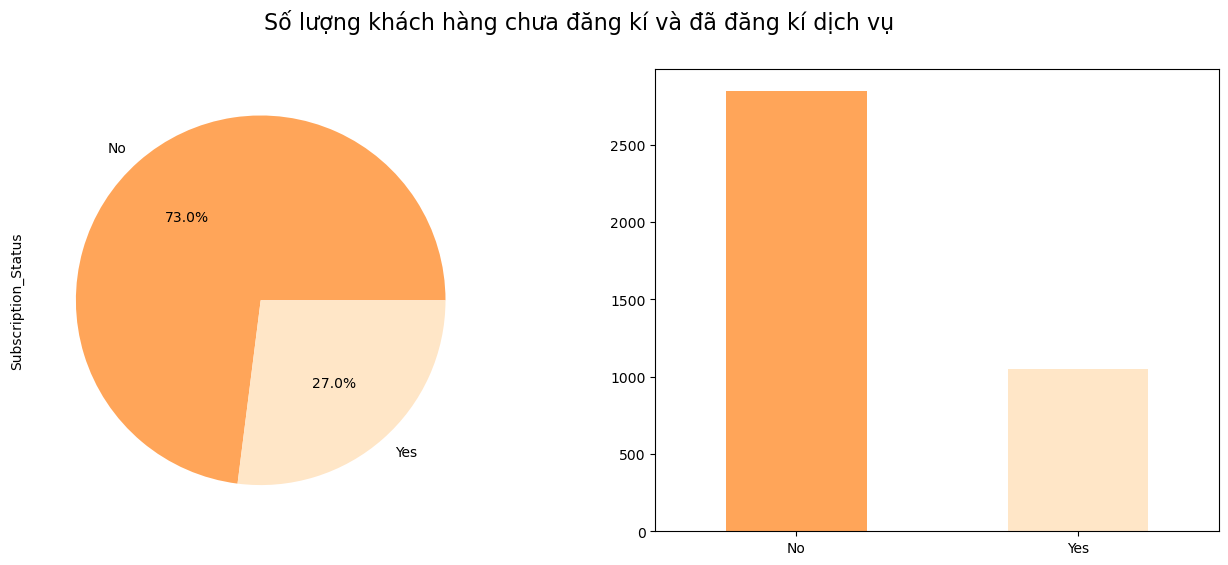

In [1318]:
fig, axs = plt.subplots(1, 2, figsize = (16,6)) 

df_shopping[target_col].value_counts().plot(
    kind = 'pie'
    , ax = axs[0]
    , colors = ['#FFA559', '#FFE6C7']
    , autopct = '%.1f%%'
)

df_shopping[target_col].value_counts().sort_index().plot(
    kind = 'bar'
    , ax = axs[1]
    , color = ['#FFA559', '#FFE6C7']
    , rot = 0
)

fig.suptitle("Số lượng khách hàng chưa đăng kí và đã đăng kí dịch vụ", fontsize = 16)

plt.show()

## Univariate Analysis

### Numerical columns

In [1319]:
df_shopping[num_col]

,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31
...,...,...,...,...
3895,40,28,4.2,32
3896,52,49,4.5,41
3897,46,33,2.9,24
3898,44,77,3.8,24


In [1320]:
num_col_skew = df_shopping.select_dtypes(include='number')
num_col_skew.skew()

Age                     -0.006380
Purchase_Amount_(USD)    0.012702
Review_Rating            0.004525
Previous_Purchases       0.003121
dtype: float64

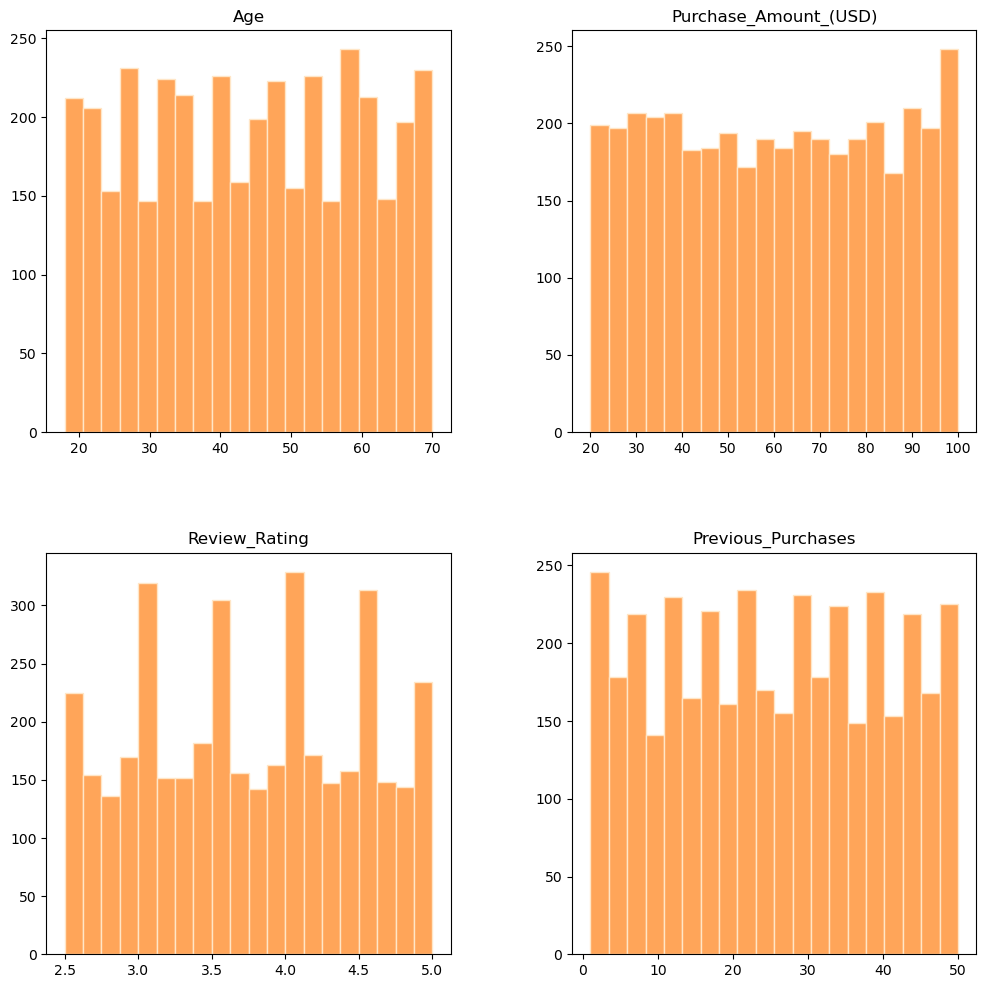

In [1321]:
df_shopping[num_col].hist(
    figsize = (12, 12)
    , bins = 20
    , color = '#FFA559'
    , edgecolor = '#FFE6C7'
    , grid=False)
plt.show()

Symmetrical distribution, no skew.

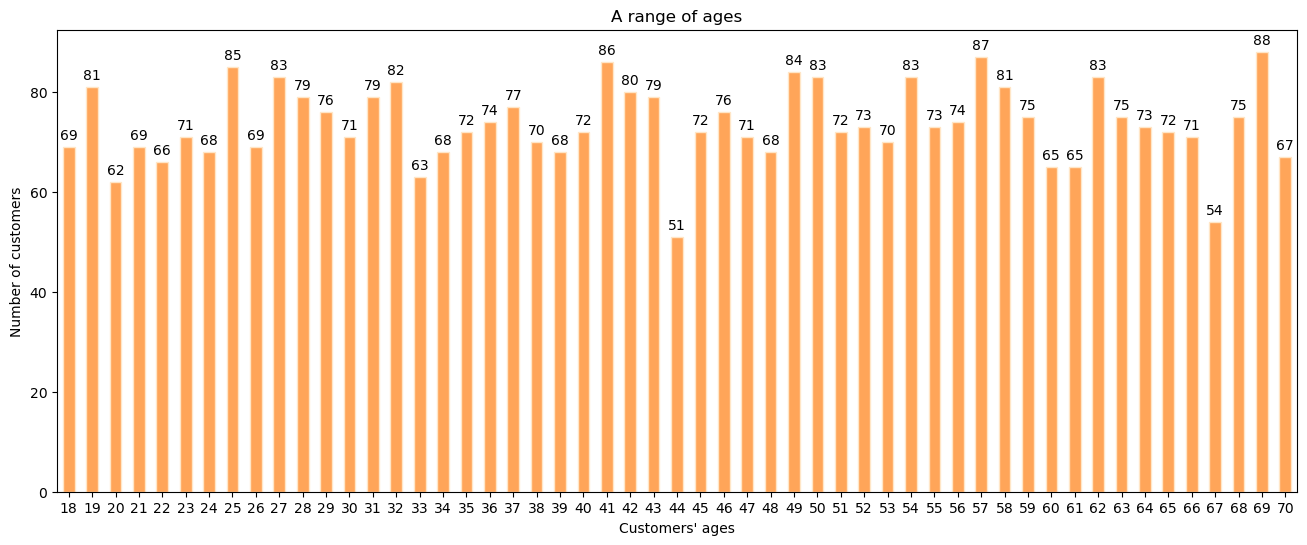

In [1322]:
# Age

plt.figure(figsize = (16,6))

ax = df_shopping['Age'].value_counts().sort_index().plot(
    kind = 'bar'
    , color = '#FFA559'
    , edgecolor = '#FFE6C7'
    , rot = 0
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel("Customers' ages")
plt.ylabel("Number of customers")
plt.title("A range of ages")
plt.show()

In [1323]:
age_counts = df_shopping['Age'].value_counts()
print(age_counts.nlargest(5))

69    88
57    87
41    86
25    85
49    84
Name: Age, dtype: int64


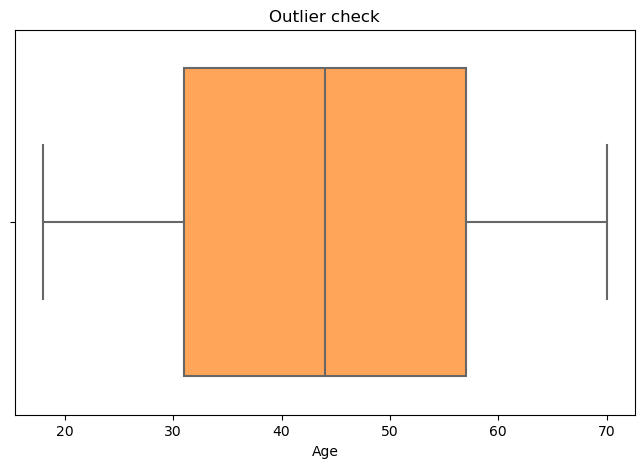

In [1324]:
plt.figure(figsize = (8,5))

sns.boxplot(
    x = df_shopping['Age']
    , color = '#FFA559'
    , saturation=1.0 
)

plt.xlabel("Age")
plt.title("Outlier check")
plt.show()

No outliers found.

- The largest groups are at ages 57 and 69, representing older customers.

- Middle-aged customers (41 and 49) also form a significant portion.

- Among customers under 30, most are 25 years old.

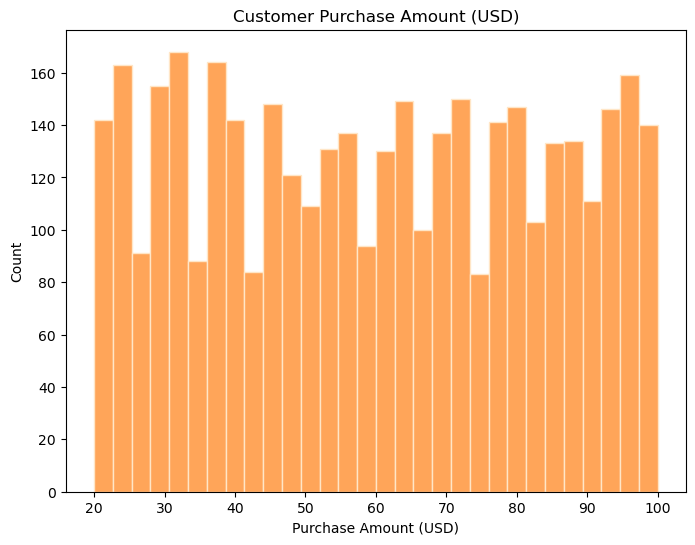

In [1325]:
# Purchase Amount

plt.figure(figsize = (8,6))

plt.hist(
    df_shopping['Purchase_Amount_(USD)']
    , bins = 30
    , color = '#FFA559'
    , edgecolor = '#FFE6C7'
)

plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Count")
plt.title("Customer Purchase Amount (USD)")
plt.show()

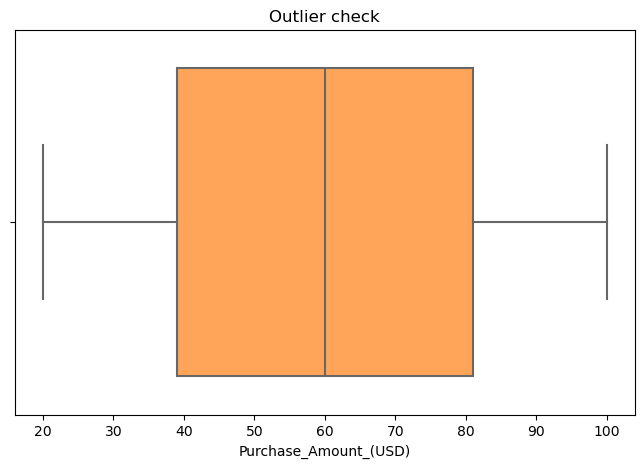

In [1326]:
plt.figure(figsize = (8,5))

sns.boxplot(
    x = df_shopping['Purchase_Amount_(USD)']
    , color = '#FFA559'
    , saturation=1.0 
)

plt.title("Outlier check")
plt.show()

No outliers found.

- Most order values fall in the ranges 20–40 USD and 90–100 USD.

- The average order value is 59 USD.

This suggests that customers tend to choose either mid-range priced items or higher-end products.

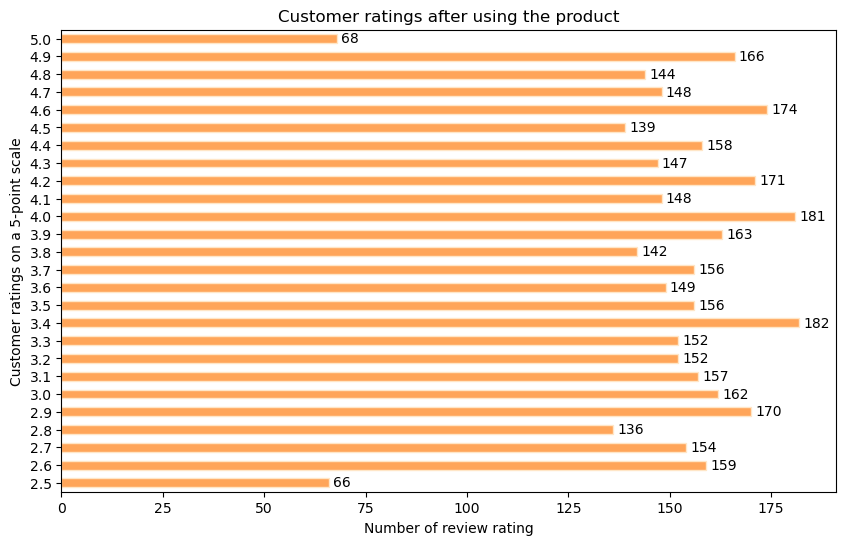

In [1327]:
#Review Rating

plt.figure(figsize = (10,6))

ax = df_shopping['Review_Rating'].value_counts().sort_index().plot(
    kind = 'barh'
    , color = ['#FFA559']
    , edgecolor = '#FFE6C7'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel("Number of review rating")
plt.ylabel("Customer ratings on a 5-point scale")
plt.title("Customer ratings after using the product")
plt.show()

In [1328]:
review_counts = df_shopping['Review_Rating'].value_counts()
print(review_counts.nlargest(5))

3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
Name: Review_Rating, dtype: int64


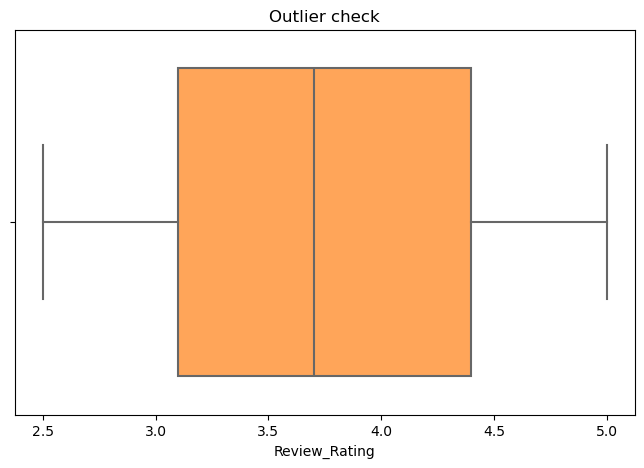

In [1329]:
plt.figure(figsize = (8,5))

sns.boxplot(
    x = df_shopping['Review_Rating']
    , color = '#FFA559'
    , saturation=1.0 
)

plt.title("Outlier check")
plt.show()

No outliers found.

- Most customers gave a rating of 3.4, but the number of ratings at 4.x (especially 4.6) is almost as high.

- The average customer rating is 3.7.

This shows that customers are generally quite satisfied after using the product.

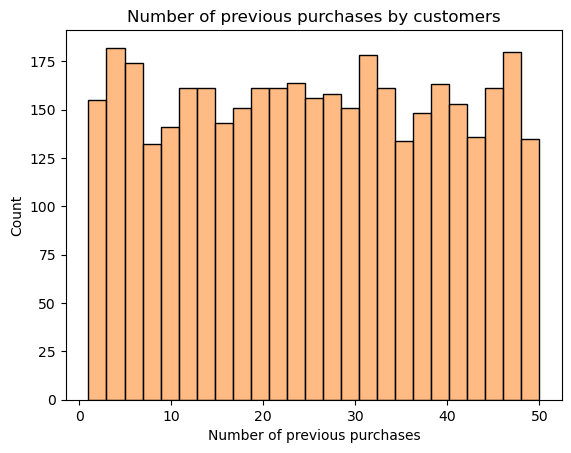

In [1330]:
# Previous Purchases

sns.histplot(
    df_shopping
    , x = 'Previous_Purchases'
    , bins = 25
    , color = '#FFA559'
    )

plt.xlabel("Number of previous purchases")
plt.ylabel("Count")
plt.title("Number of previous purchases by customers")
plt.show()

In [1331]:
previous_count = df_shopping['Previous_Purchases'].value_counts()
print(previous_count.nlargest(5))

31    97
21    96
14    92
24    91
3     91
Name: Previous_Purchases, dtype: int64


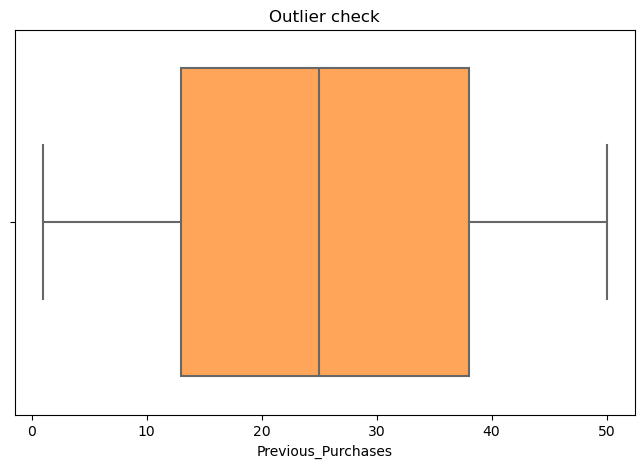

In [1332]:
plt.figure(figsize = (8,5))

sns.boxplot(
    x = df_shopping['Previous_Purchases']
    , color = '#FFA559'
    , saturation=1.0 
)

plt.title("Outlier check")
plt.show()

No outliers found.

- Overall, the distribution of previous purchase counts is fairly even and multimodal (more than two peaks). Specifically, the density plot shows three peaks around 1, 31, and 47 purchases.

- There are no gaps in the distribution, indicating that most customers return to buy again, and the repurchase frequency is high.

### Categorical columns

In [1333]:
cat_col

['Gender',
 'Item_Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Shipping_Type',
 'Discount_Applied',
 'Promo_Code_Used',
 'Payment_Method',
 'Frequency_of_Purchases']

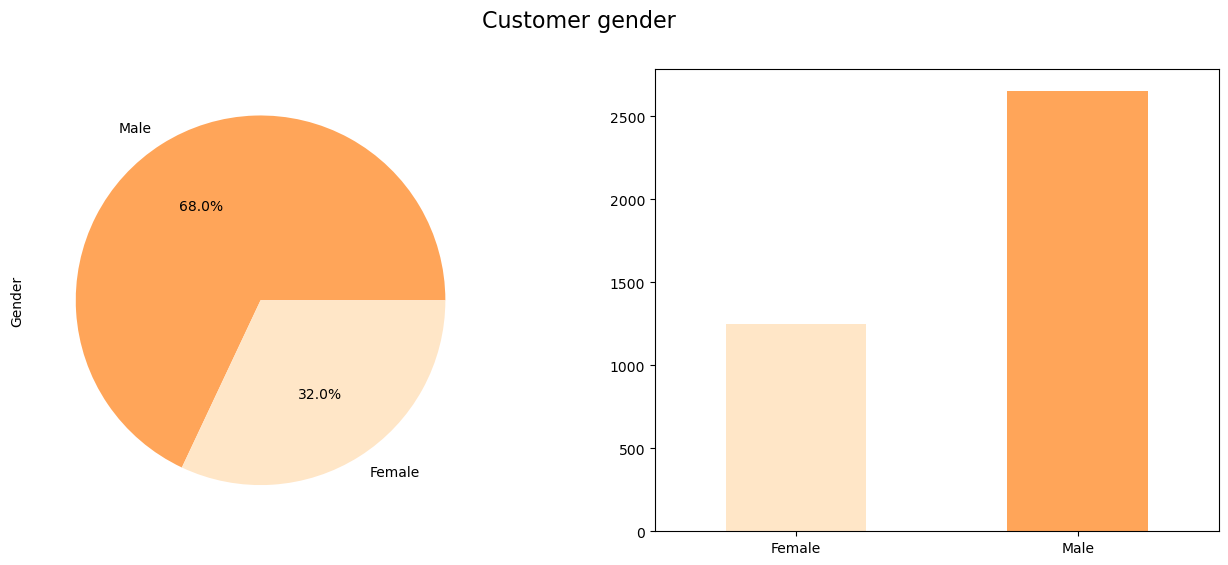

In [1334]:
# Gender

fig, axs = plt.subplots(1, 2, figsize = (16,6))

#Pie chart
df_shopping['Gender'].value_counts().plot(
    kind = 'pie'
    , colors = ['#FFA559', '#FFE6C7']
    , autopct = '%.1f%%'
    , ax = axs[0]
)

#Bar chart
df_shopping['Gender'].value_counts().sort_index().plot(
    kind = 'bar'
    , ax = axs[1]
    , color = ['#FFE6C7', '#FFA559']
    , rot = 0
)

fig.suptitle("Customer gender", fontsize = 16)

plt.show()


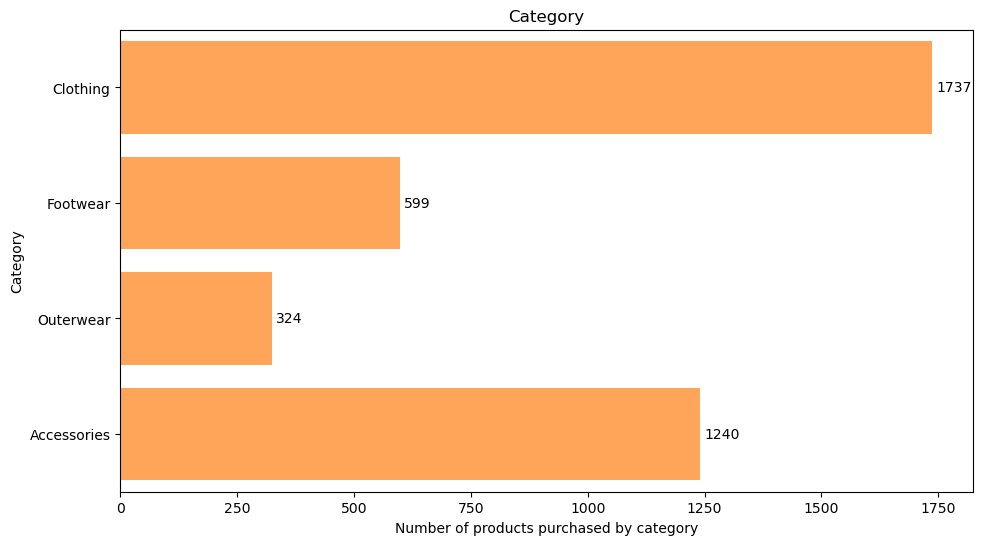

In [1335]:
# Category
fig, axs = plt.subplots(figsize = (11,6))

ax = sns.countplot(
    df_shopping
    , y = 'Category'
    , color='#FFA559'
    , saturation=1.0 
    )

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.xlabel("Number of products purchased by category")
plt.ylabel("Category")
plt.title("Category")
plt.show()

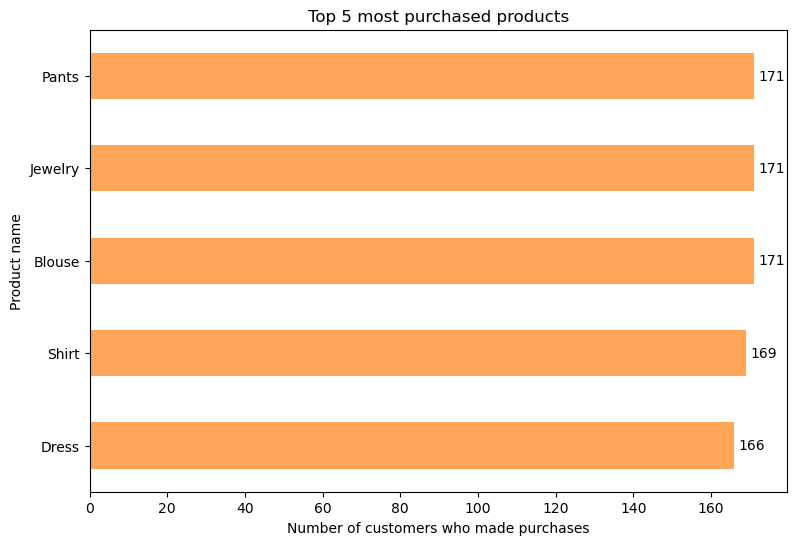

In [1336]:
# Item Purchased

top5_item = df_shopping['Item_Purchased'].value_counts().nlargest(5)

fig, axs = plt.subplots(figsize = (9,6))

ax = top5_item.sort_values(ascending=True).plot(
    kind='barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel("Number of customers who made purchases")
plt.ylabel("Product name")
plt.title("Top 5 most purchased products")
plt.show()

In [1337]:
item_cate = (df_shopping.groupby('Category')['Item_Purchased'].unique())
item_cate.columns = ['Category', 'Item_Purchased']

pd.set_option('display.max_colwidth', None) 

item_cate

Category
Accessories                      [Handbag, Sunglasses, Jewelry, Scarf, Hat, Backpack, Belt, Gloves]
Clothing       [Blouse, Sweater, Jeans, Shirt, Shorts, Dress, Skirt, Pants, Hoodie, T-shirt, Socks]
Footwear                                                          [Sandals, Sneakers, Shoes, Boots]
Outerwear                                                                            [Coat, Jacket]
Name: Item_Purchased, dtype: object

The top 5 most purchased products are mostly clothing items (blouse, shirt, dress, pants), with the only non-clothing item being a necklace (in the accessories category).

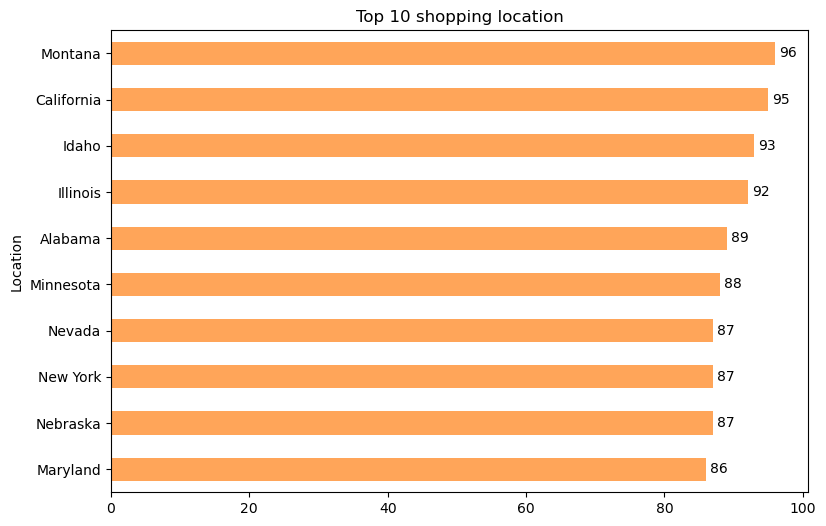

In [1338]:
# Location
# Do có 50 location nên chỉ chọn ra top 10 location

top10_location = df_shopping['Location'].value_counts().nlargest(10)

fig, axs = plt.subplots(figsize = (9,6))

ax = top10_location.sort_values(ascending=True).plot(
    kind='barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.ylabel("Location")
plt.title("Top 10 shopping location")
plt.show()

AxesImage(shape=(495, 800, 3))


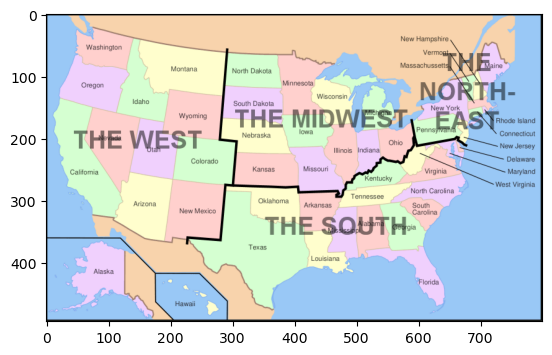

In [1339]:
print(plt.imshow(plt.imread("./MapUSA.png")))

The locations with the highest number of customers tend to be in the western United States (west + midwest).

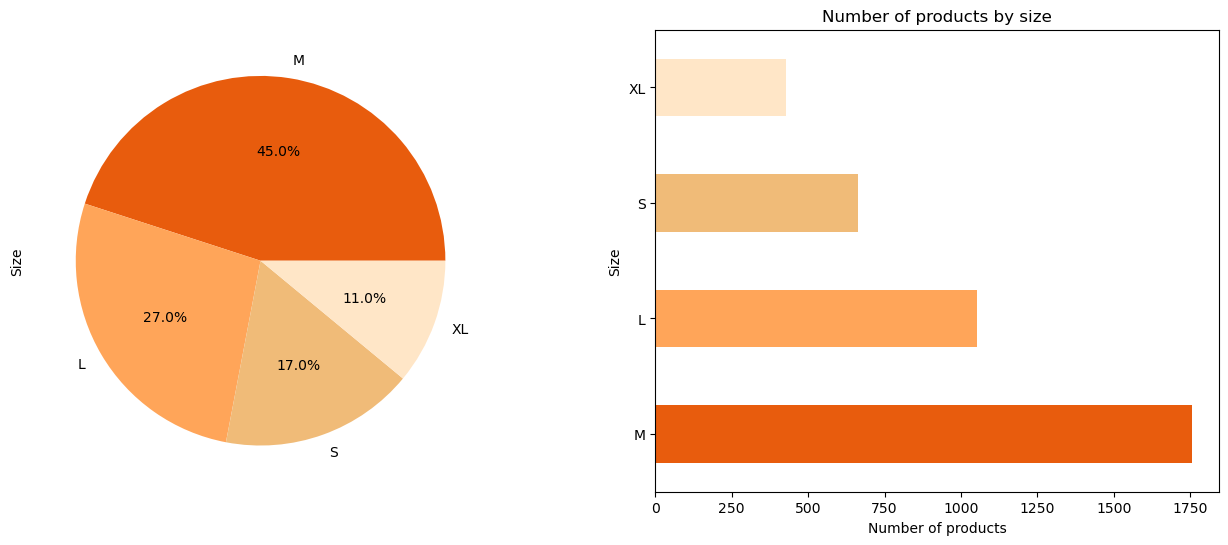

In [1340]:
# Size

fig, axs = plt.subplots(1, 2, figsize = (16,6))

color_custom = ['#E85C0D','#FFA559', '#F0BB78','#FFE6C7']

#Pie chart
df_shopping['Size'].value_counts().plot(
    kind = 'pie'
    , colors = color_custom
    , autopct = '%.1f%%'
    , ax = axs[0]
)

#Bar chart
df_shopping['Size'].value_counts().plot(
    kind = 'barh'
    , ax = axs[1]
    , color = color_custom
    , rot = 0
)

plt.xlabel("Number of products")
plt.ylabel("Size")
plt.title("Number of products by size")
plt.show()

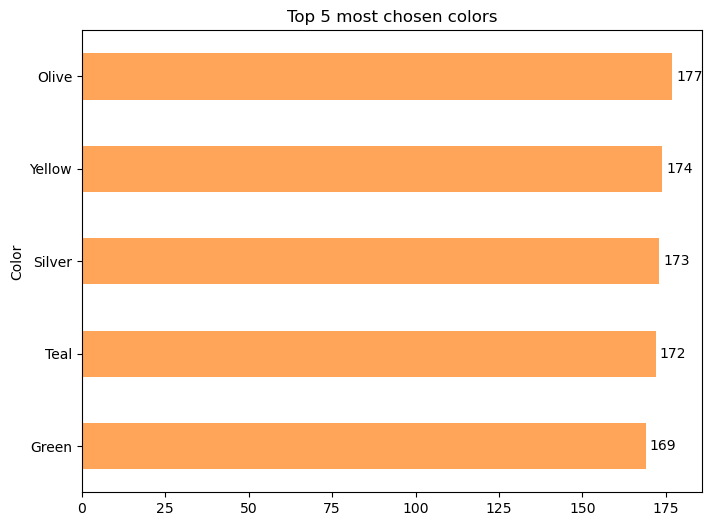

In [1341]:
# Color

top5_color = df_shopping['Color'].value_counts().nlargest(5)

fig, ax = plt.subplots(figsize = (8,6))
ax = top5_color.sort_values(ascending=True).plot(
    kind='barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.ylabel("Color")
plt.title("Top 5 most chosen colors")
plt.show()

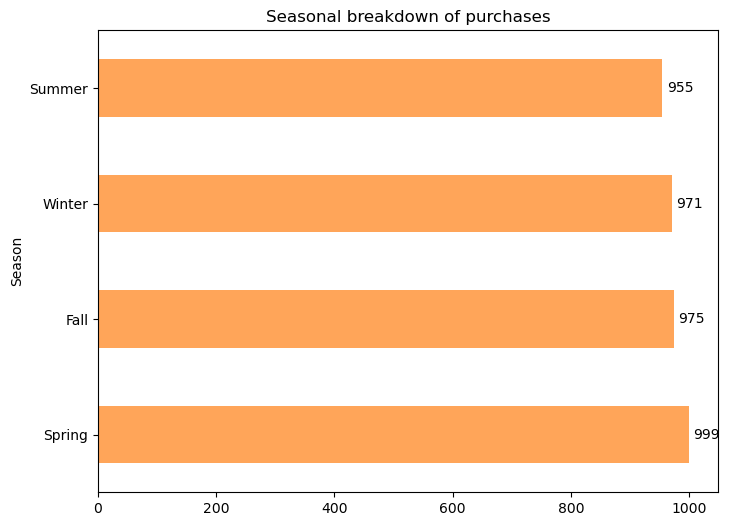

In [1342]:
# Season

fig, ax = plt.subplots(figsize = (8, 6))
ax = df_shopping['Season'].value_counts().plot(
    kind = 'barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.ylabel("Season")
plt.title("Seasonal breakdown of purchases")
plt.show()

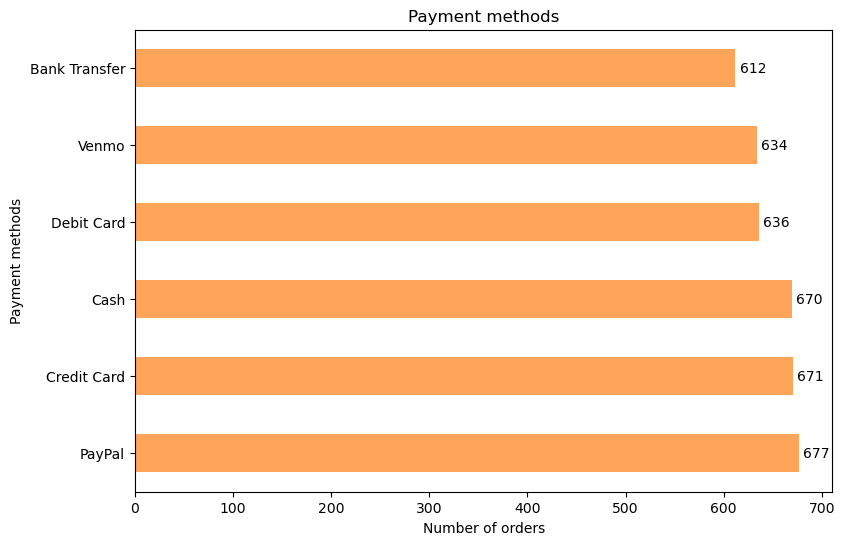

In [1343]:
# Payment Method

fig, ax = plt.subplots(figsize = (9, 6))
ax = df_shopping['Payment_Method'].value_counts().plot(
    kind='barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel("Number of orders")
plt.ylabel("Payment methods")
plt.title("Payment methods")
plt.show()

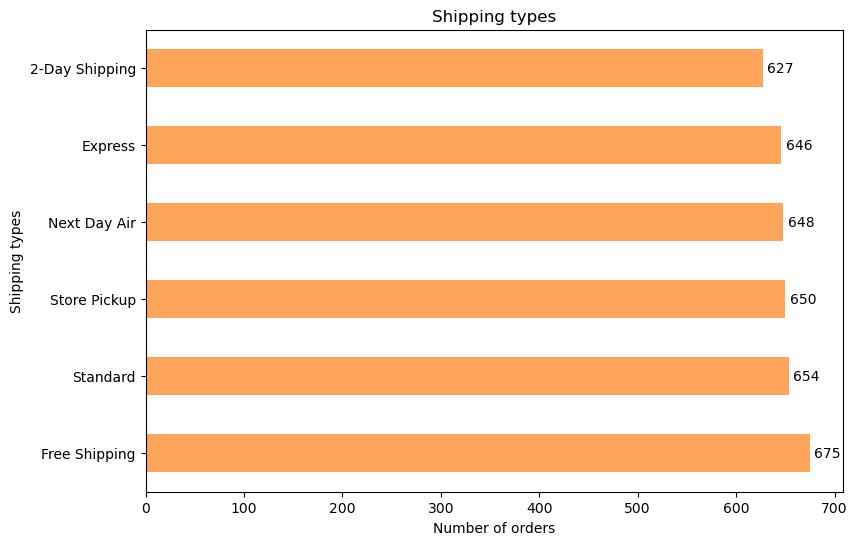

In [1344]:
# Shipping Type

fig, ax = plt.subplots(figsize = (9, 6))
df_shopping['Shipping_Type'].value_counts().plot(
    kind='barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
   
plt.xlabel("Number of orders") 
plt.ylabel("Shipping types")
plt.title("Shipping types")
plt.show()

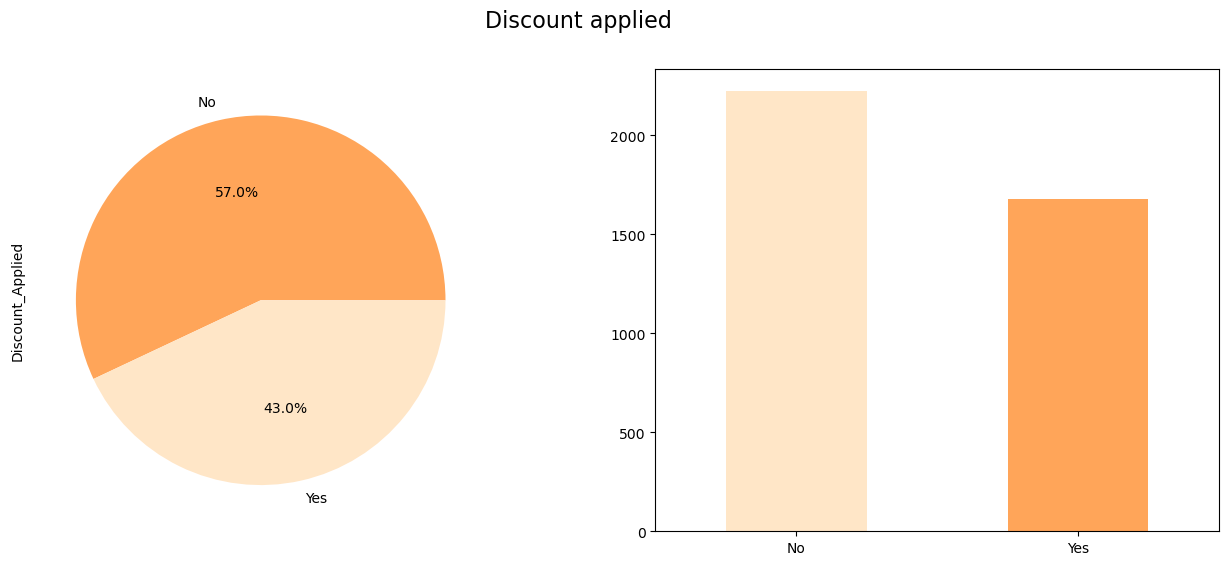

In [1345]:
# Discount Applied

fig, axs = plt.subplots(1, 2, figsize = (16,6))

#Pie chart
df_shopping['Discount_Applied'].value_counts().plot(
    kind = 'pie'
    , colors = ['#FFA559', '#FFE6C7']
    , autopct = '%.1f%%'
    , ax = axs[0]
)

#Bar chart
df_shopping['Discount_Applied'].value_counts().sort_index().plot(
    kind = 'bar'
    , ax = axs[1]
    , color = ['#FFE6C7', '#FFA559']
    , rot = 0
)

fig.suptitle("Discount applied", fontsize = 16)

plt.show()

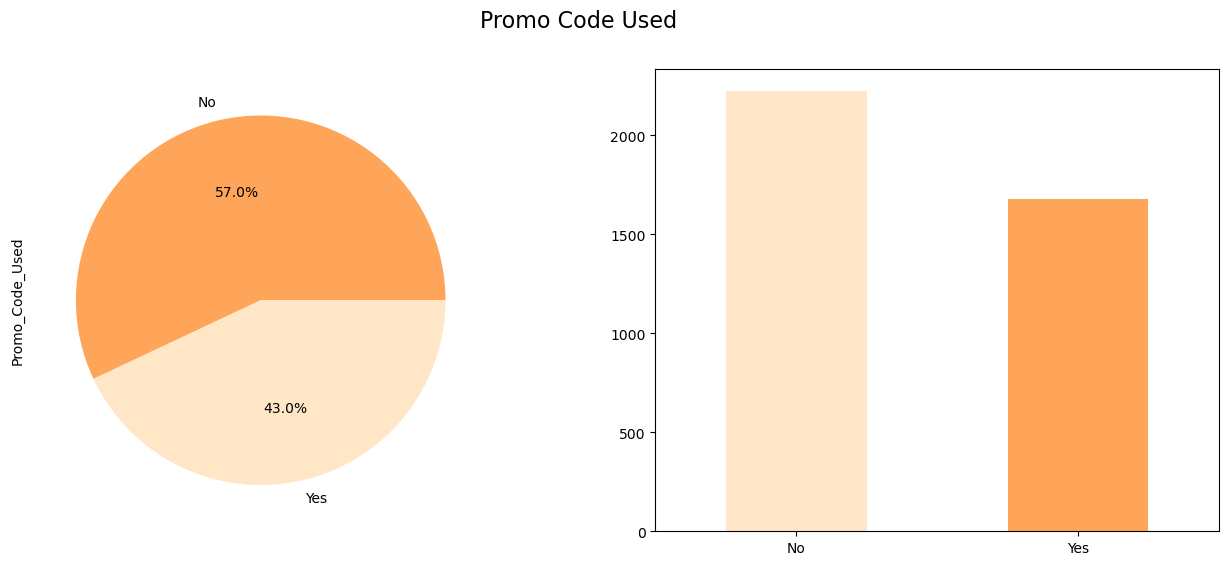

In [1346]:
# Promo Code Used

fig, axs = plt.subplots(1, 2, figsize = (16,6))

#Pie chart
df_shopping['Promo_Code_Used'].value_counts().plot(
    kind = 'pie'
    , colors = ['#FFA559', '#FFE6C7']
    , autopct = '%.1f%%'
    , ax = axs[0]
)

#Bar chart
df_shopping['Promo_Code_Used'].value_counts().sort_index().plot(
    kind = 'bar'
    , ax = axs[1]
    , color = ['#FFE6C7', '#FFA559']
    , rot = 0
)

fig.suptitle("Promo Code Used", fontsize = 16)

plt.show()

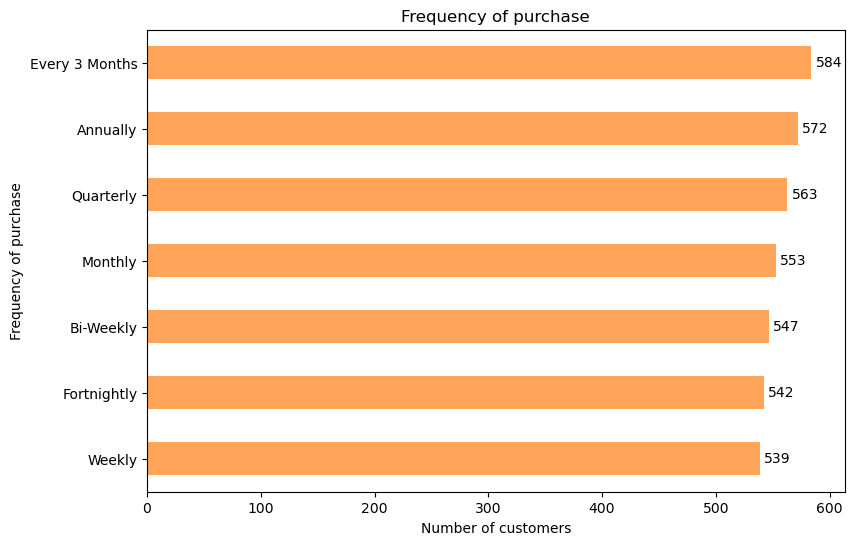

In [1347]:
# Frequency of Purchases

fig, ax = plt.subplots(figsize = (9, 6))
df_shopping['Frequency_of_Purchases'].value_counts().sort_values(ascending=True).plot(
    kind='barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel("Number of customers")
plt.ylabel("Frequency of purchase")
plt.title("Frequency of purchase")
plt.show()

## Multivariate Analysis

### Numerical columns

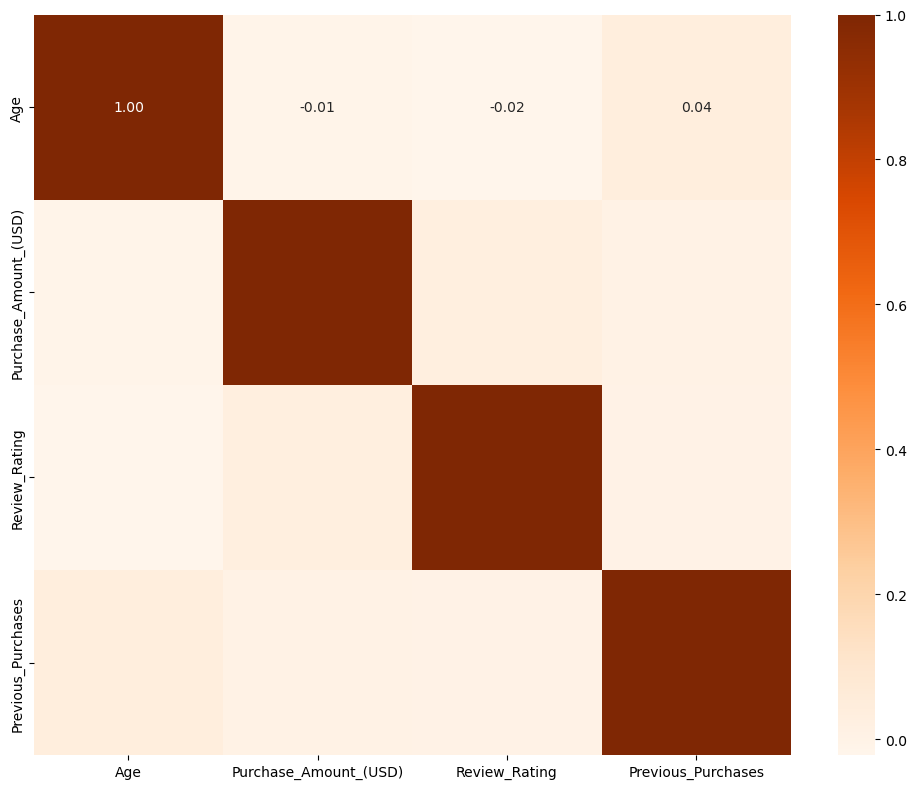

In [1348]:
plt.figure(figsize=(10, 8))
num_corr = df_shopping[num_col].corr()
sns.heatmap(num_corr
            , cmap="Oranges"
            , annot=True
            , fmt='.2f')
plt.tight_layout()
plt.show()

From the heatmap, we see that the numerical variables have almost no correlation with each other.

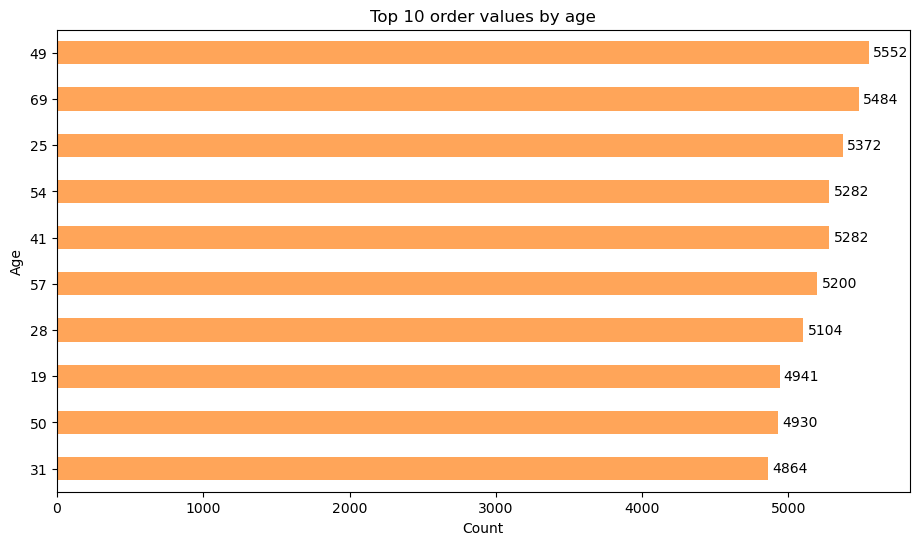

In [1349]:
# Age + Purchase Amount
top10_age = df_shopping.groupby('Age')['Purchase_Amount_(USD)'].sum().nlargest(10)

plt.figure(figsize=(11, 6))

ax = top10_age.sort_values(ascending=True).plot(
    kind = 'barh'
    , color = '#FFA559'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel("Count")
plt.ylabel("Age")
plt.title("Top 10 order values by age")
plt.show()

Overall, middle-aged and older customers spend more than younger customers.

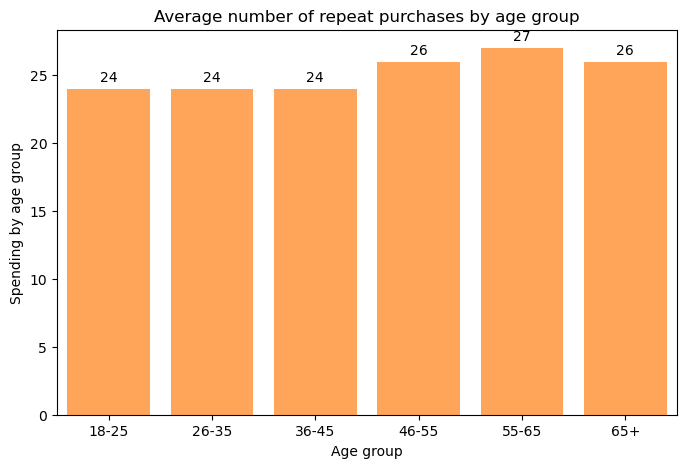

In [1350]:
# Age + Previous Purchases

df_shopping['age_bin'] = pd.cut(
    df_shopping['Age']
    , bins = [18, 25, 35, 45, 55, 65, df_shopping['Age'].max()]
    , labels = ['18-25', '26-35', '36-45', '46-55', '55-65', '65+']
    , right = True
    , include_lowest = True
)

age_previous_purchases = (df_shopping.groupby('age_bin')['Previous_Purchases'].median().reset_index(name='avg_previous_purchases'))

plt.figure(figsize=(8,5))

ax = sns.barplot(
    data = age_previous_purchases
    , x = 'age_bin'
    , y = 'avg_previous_purchases'
    , color = '#FFA559'
    , saturation = 1.0
    )

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.xlabel('Age group')
plt.ylabel('Spending by age group')
plt.title('Average number of repeat purchases by age group')
plt.show()

In general, middle-aged and older customers have a higher average repurchase count than other groups.

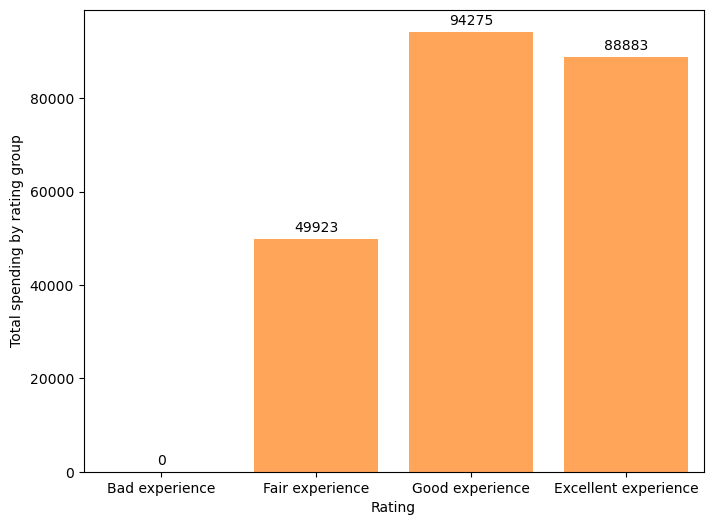

In [1351]:
df_shopping['rating_bin'] = pd.cut(
    df_shopping['Review_Rating']
    , bins = [1.0, 2.0, 3.0, 4.0, 5.0]
    , labels = ['Bad experience', 'Fair experience', 'Good experience', 'Excellent experience']
    , right = True
    , include_lowest = True
)
sum_rate_purchase_amount = df_shopping.groupby(['rating_bin'])['Purchase_Amount_(USD)'].agg(
    sum_rate_purchase = 'sum'
).reset_index()

plt.figure(figsize = (8, 6))
ax = sns.barplot(
    data = sum_rate_purchase_amount
    , x = 'rating_bin'
    , y = 'sum_rate_purchase'
    , color = '#FFA559'
    , saturation = 1.0
)
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.xlabel("Rating")   
plt.ylabel("Total spending by rating group")
plt.show()

#### Each Numerical Variable vs. Target

In general, when we look at each numerical feature on its own (Age, Purchase Amount, Review Rating, Previous Purchases) against the subscription target:

- No outliers were found in any subscription group.

- The histograms show a large overlap between subscribers and non-subscribers.

- None of these four features, on their own, are strong enough to predict whether a customer will subscribe.

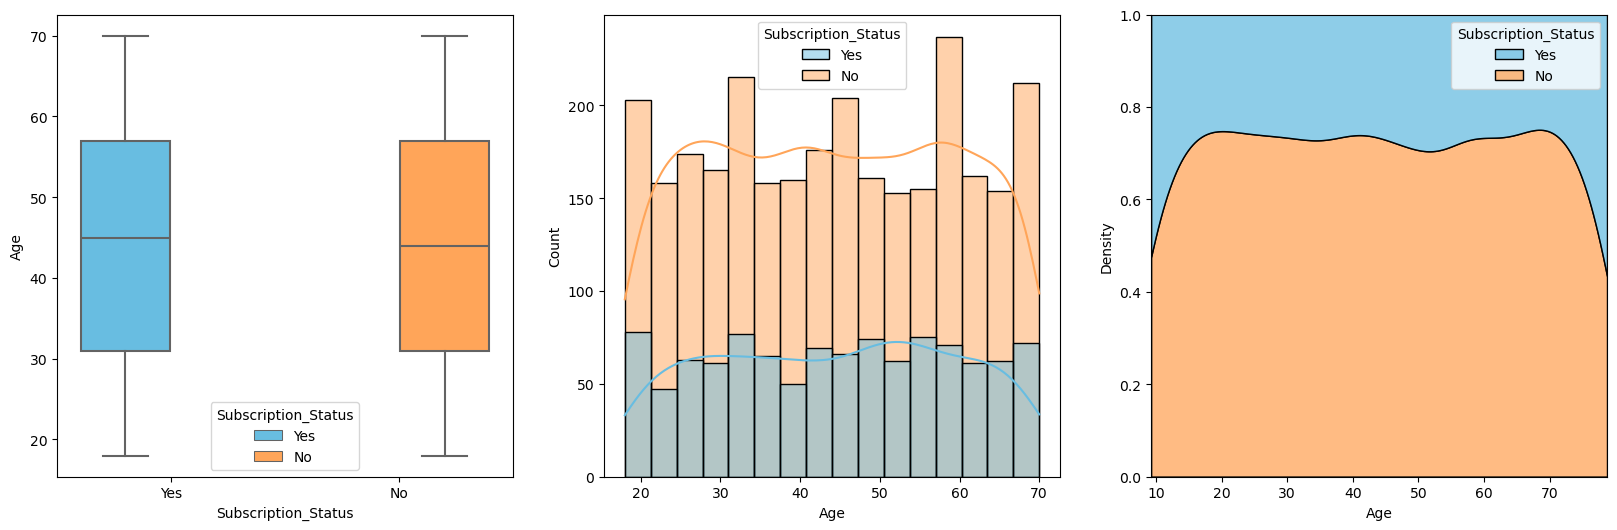

In [1352]:
# Age with target 

fig, axs = plt.subplots(1,3,figsize=(20, 6))

custom_palette = ['#68BDE1', '#FFA559']

sns.boxplot(
    df_shopping
    , x = target_col
    , hue = target_col
    , y = 'Age'
    , palette = custom_palette
    , saturation=1.0
    , ax=axs[0]
)
sns.histplot(
    df_shopping
    , x = 'Age'
    , hue = target_col
    , palette = custom_palette
    , kde=True
    , ax=axs[1]
)
sns.kdeplot(
    df_shopping
    , x = 'Age'
    , hue = target_col
    , palette = custom_palette
    , multiple='fill'
    , ax=axs[2]
)
plt.show()

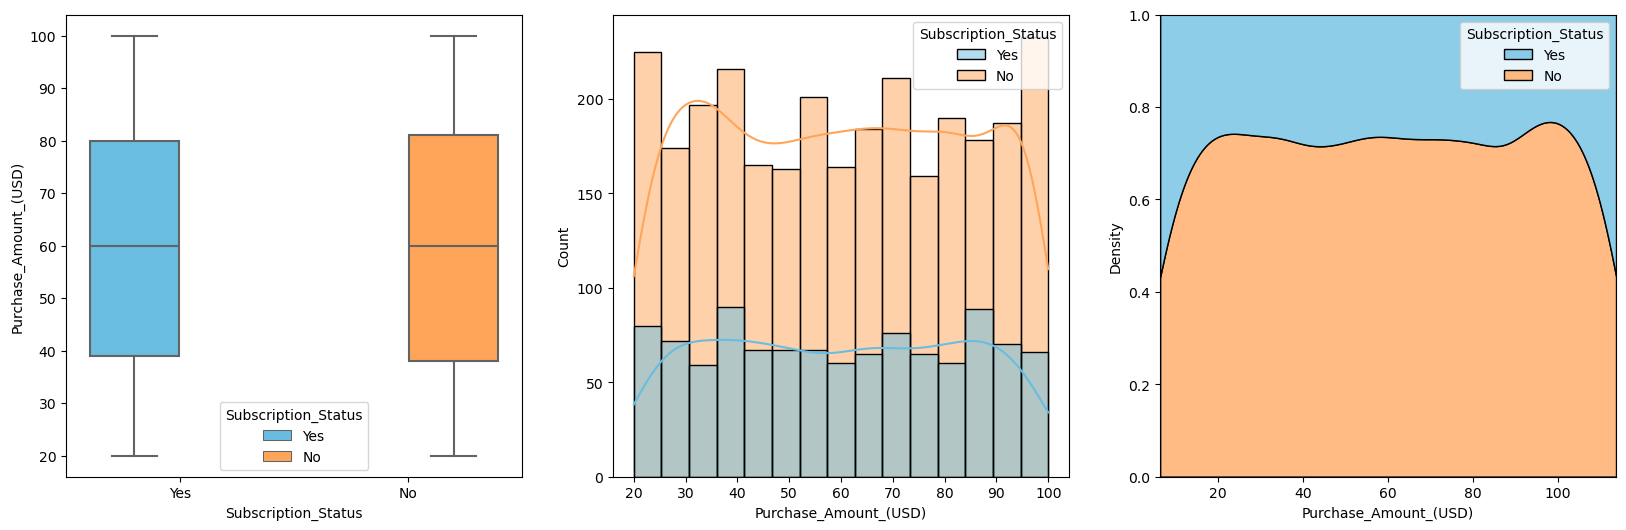

In [1353]:
# Purchase Amount (USD) with target 

fig, axs = plt.subplots(1,3,figsize=(20, 6))

custom_palette = ['#68BDE1', '#FFA559']

sns.boxplot(
    df_shopping
    , x = target_col
    , hue = target_col
    , y = 'Purchase_Amount_(USD)'
    , palette = custom_palette
    , saturation=1.0
    , ax=axs[0]
)
sns.histplot(
    df_shopping
    , x = 'Purchase_Amount_(USD)'
    , hue = target_col
    , palette = custom_palette
    , kde=True
    , ax=axs[1]
)
sns.kdeplot(
    df_shopping
    , x = 'Purchase_Amount_(USD)'
    , hue = target_col
    , palette = custom_palette
    , multiple='fill'
    , ax=axs[2]
)
plt.show()

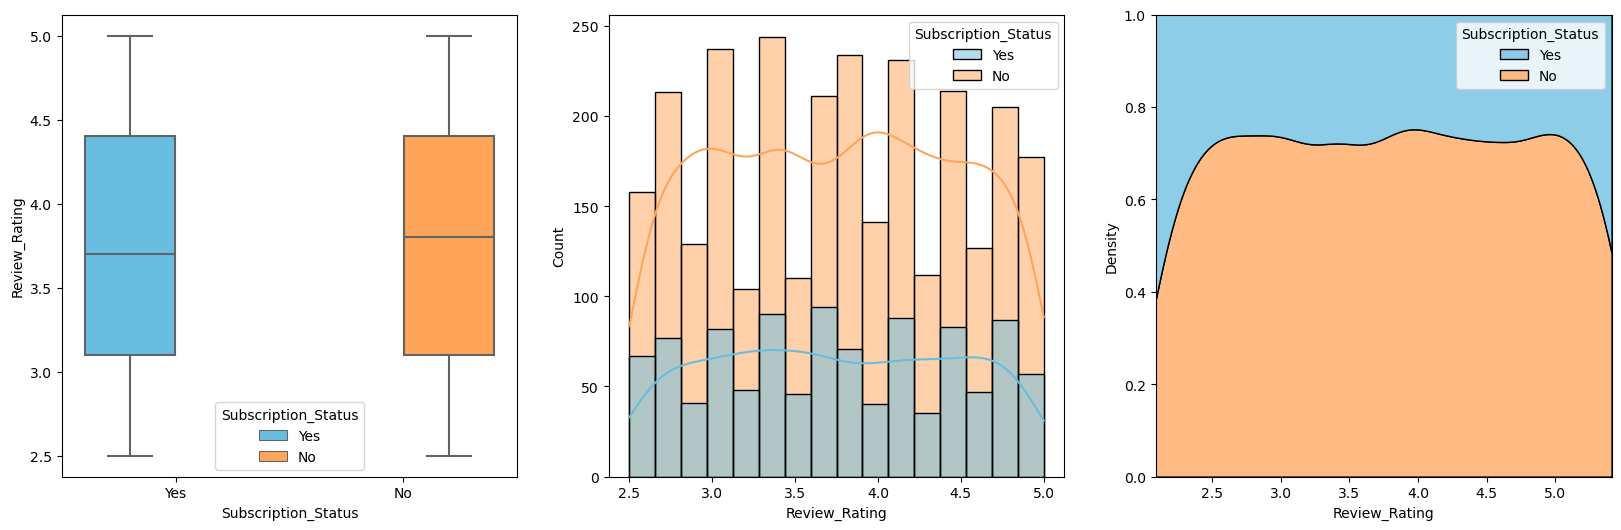

In [1354]:
# Review Rating with target 

fig, axs = plt.subplots(1,3,figsize=(20, 6))

custom_palette = ['#68BDE1', '#FFA559']

sns.boxplot(
    df_shopping
    , x = target_col
    , hue = target_col
    , y = 'Review_Rating'
    , palette = custom_palette
    , saturation=1.0
    , ax=axs[0]
)
sns.histplot(
    df_shopping
    , x = 'Review_Rating'
    , hue = target_col
    , palette = custom_palette
    , kde=True
    , ax=axs[1]
)
sns.kdeplot(
    df_shopping
    , x = 'Review_Rating'
    , hue = target_col
    , palette = custom_palette
    , multiple='fill'
    , ax=axs[2]
)
plt.show()

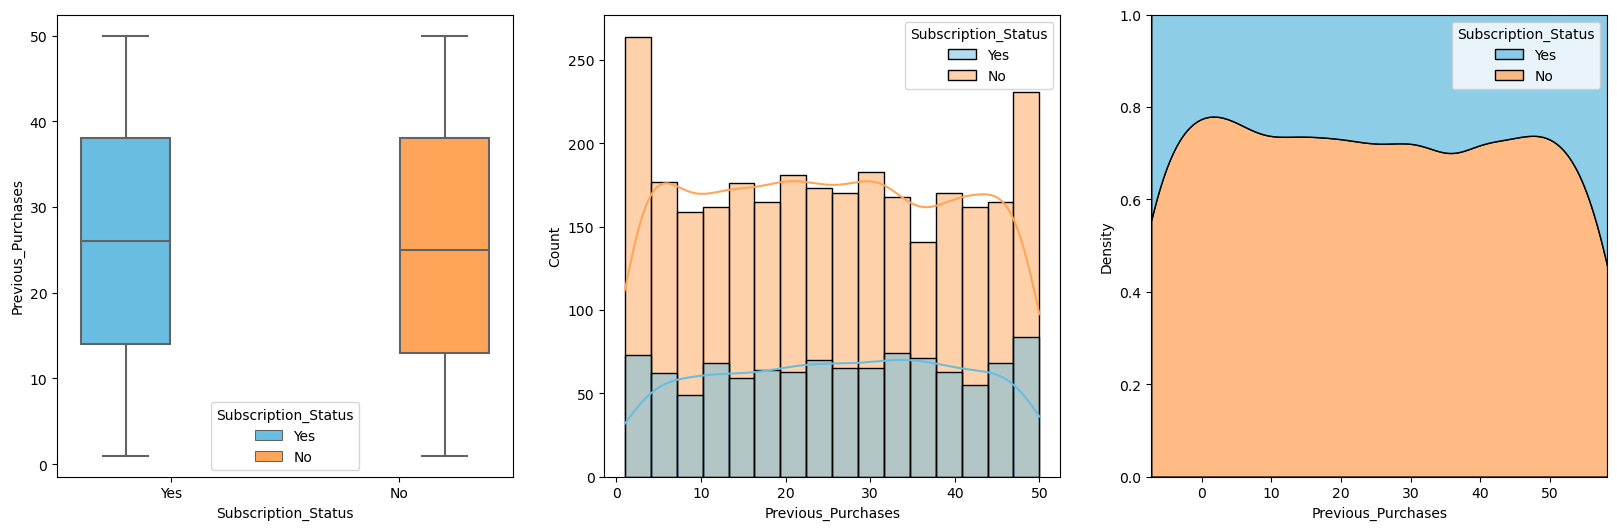

In [1355]:
# Previous Purchases with target 

fig, axs = plt.subplots(1,3,figsize=(20, 6))

custom_palette = ['#68BDE1', '#FFA559']

sns.boxplot(
    df_shopping
    , x = target_col
    , hue = target_col
    , y = 'Previous_Purchases'
    , palette = custom_palette
    , saturation=1.0
    , ax=axs[0]
)
sns.histplot(
    df_shopping
    , x = 'Previous_Purchases'
    , hue = target_col
    , palette = custom_palette
    , kde=True
    , ax=axs[1]
)
sns.kdeplot(
    df_shopping
    , x = 'Previous_Purchases'
    , hue = target_col
    , palette = custom_palette
    , multiple='fill'
    , ax=axs[2]
)
plt.show()

#### Two Numerical Variables vs. Target

In [1356]:
num_with_target = num_col + [target_col]
num_with_target

['Age',
 'Purchase_Amount_(USD)',
 'Review_Rating',
 'Previous_Purchases',
 'Subscription_Status']

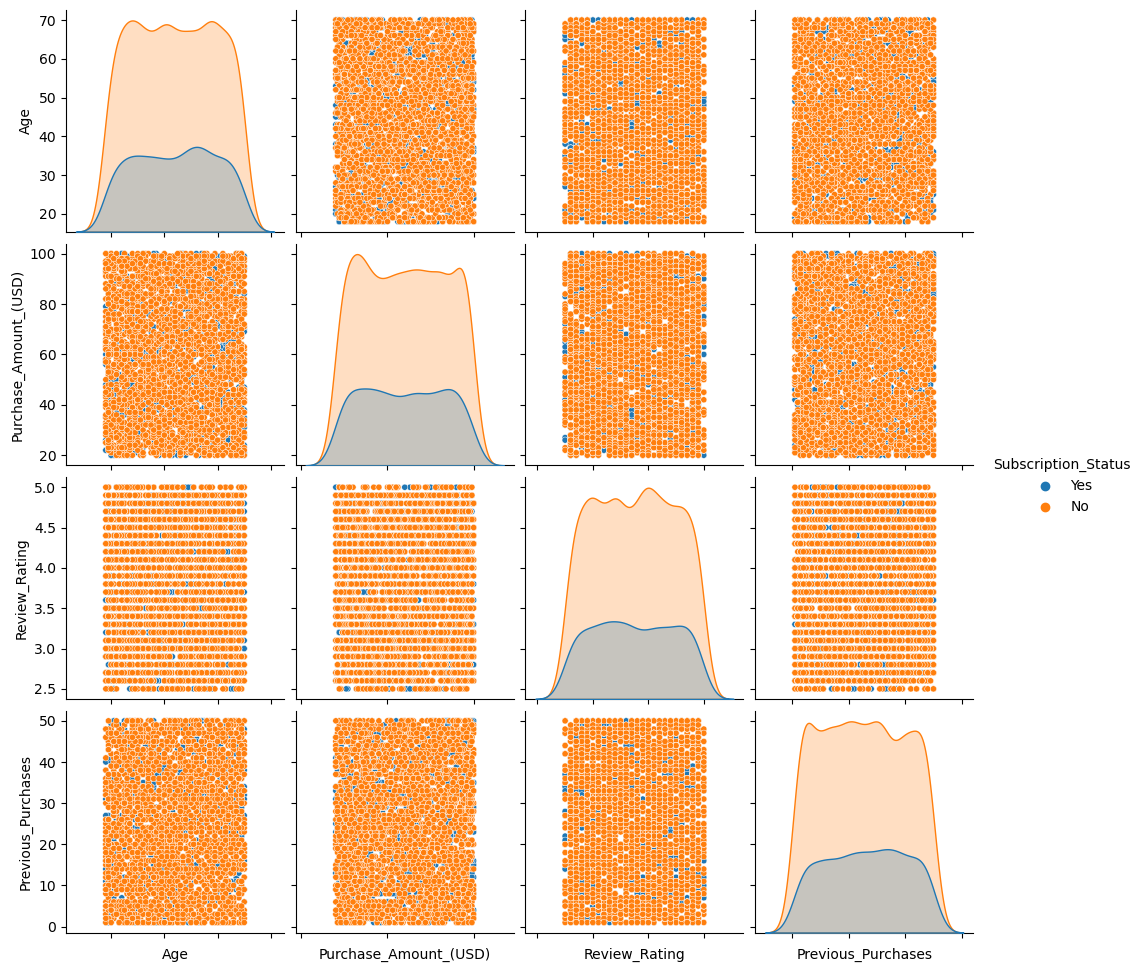

In [1357]:
pairplot = sns.pairplot(
    df_shopping[num_with_target]
    , hue = target_col
    , diag_kind='kde'
    , diag_kws=dict(fill=True)
    , plot_kws=dict(s=20)
    )
pairplot.set(xticklabels=[])

- Even when pairing any two numerical variables and comparing them to the subscription status, there is still too much overlap.

- These two‐feature combinations are not strong enough to clearly separate subscribers from non-subscribers.

## Categorical columns

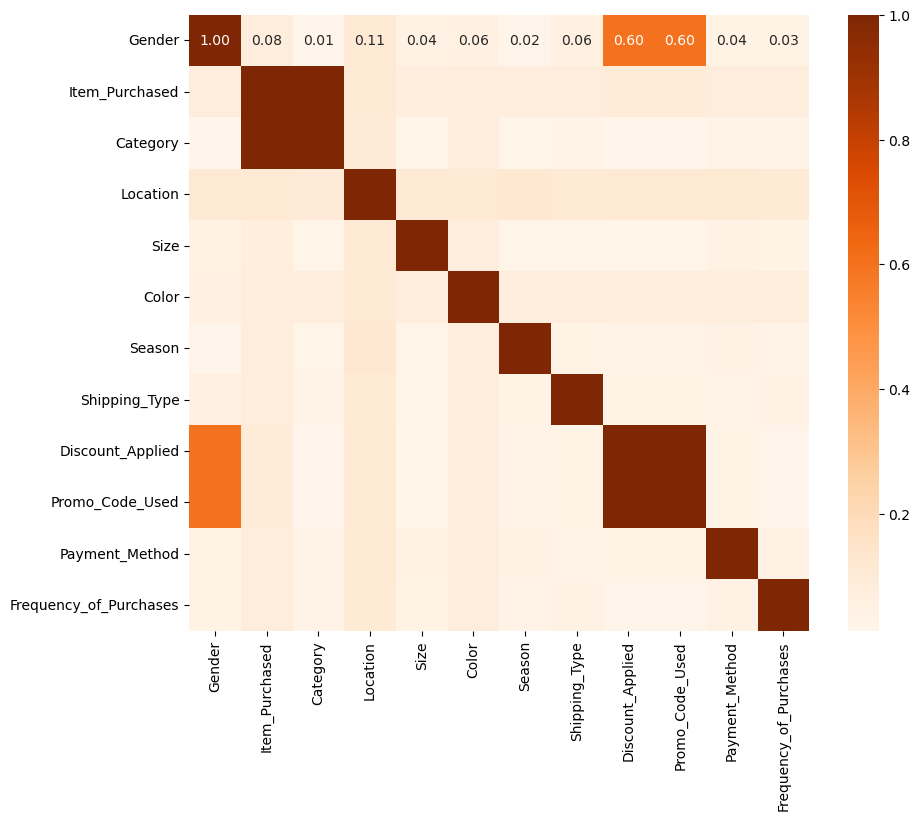

In [1358]:
def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2/(n * k))

cramer = pd.DataFrame(index=cat_col, columns=cat_col, dtype=float)

# tính tương quan mỗi cặp
for f1 in cat_col:
    for f2 in cat_col:
        cramer.loc[f1, f2] = cramers_v(df_shopping[f1], df_shopping[f2])

plt.figure(figsize=(10,8))
sns.heatmap(
    data=cramer
    , annot=True
    , fmt='.2f'
    , cmap='Oranges'
    )
plt.show()

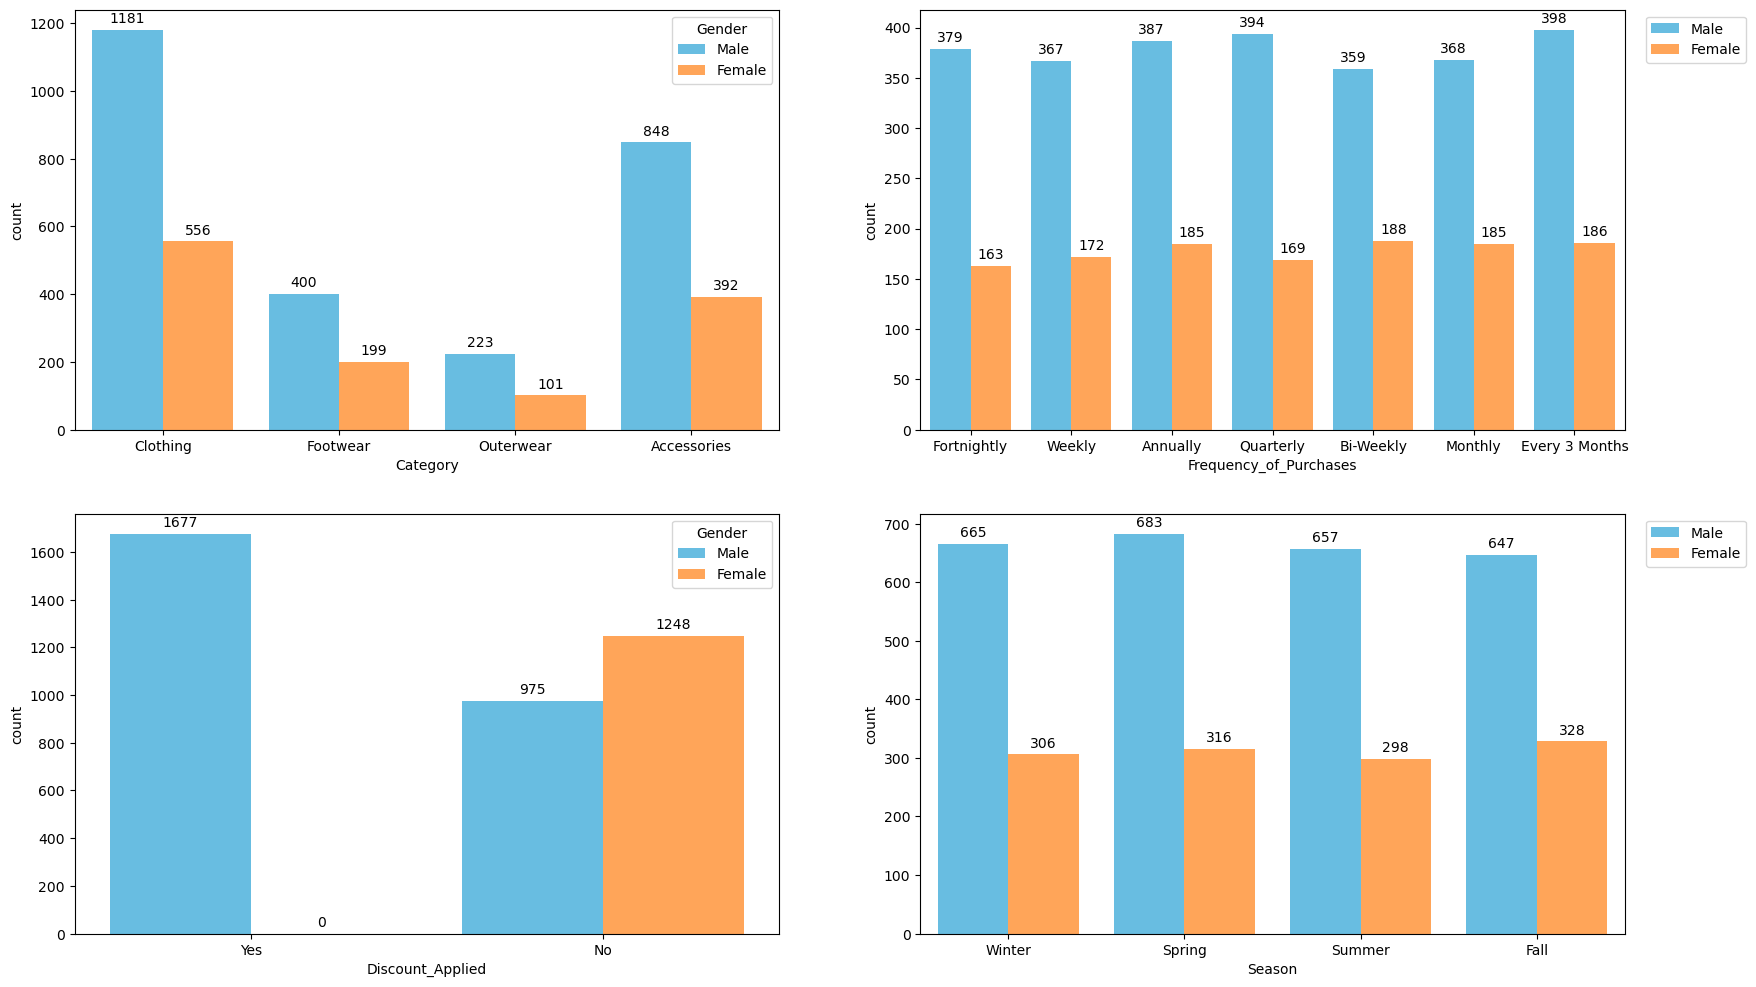

In [1359]:
fig, axs = plt.subplots(2, 2, figsize = (20, 12))

# Gender + Category
sns.countplot(
    data = df_shopping
    , x = 'Category'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
    , ax = axs[0, 0]
)
# Gender + Frequency of Purchases
sns.countplot(
    data = df_shopping
    , x = 'Frequency_of_Purchases'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
    , ax = axs[0, 1]
)
# Gender + Discount Applied
sns.countplot(
    data = df_shopping
    , x = 'Discount_Applied'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
    , ax = axs[1, 0]
)
# Gender + Season
sns.countplot(
    data = df_shopping
    , x = 'Season'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
    , ax = axs[1, 1]
)

axs[0,1].legend(loc='upper left', bbox_to_anchor=(1.02, 1))
axs[1, 1].legend(loc='upper left', bbox_to_anchor=(1.02, 1))

for ax in axs.flatten():
    for container in ax.containers:
        ax.bar_label(container, padding = 3, fmt = '%d')
        
plt.show()

- Both **male** and **female** customers buy clothing more than any other category.

- **Male** customers tend to shop about once every three months, while **female** customers shop roughly twice a week.

- **Male** customers only purchase items when they are discounted, whereas **female** customers more often buy items without discounts.

- **Male** customers are most active in spring, while **female** customers tend to shop more in fall.

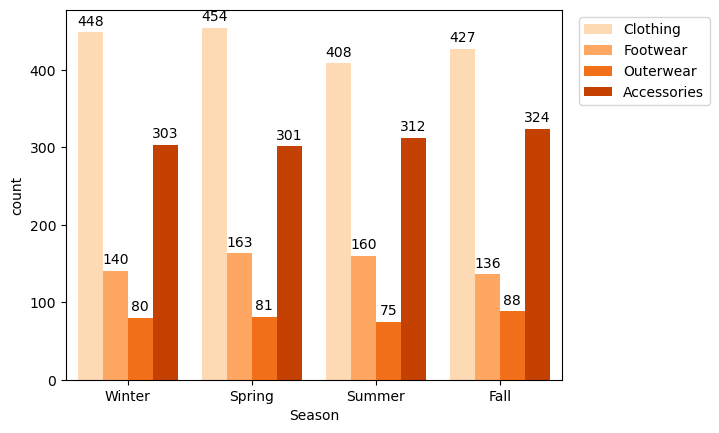

In [1360]:
ax = sns.countplot(
    data = df_shopping
    , x = 'Season'
    , hue = 'Category'
    , saturation = 1.0
    , palette = 'Oranges'
)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.show()

- In spring, customers usually buy clothing and footwear.

- In autumn, they tend to buy outerwear and accessories.

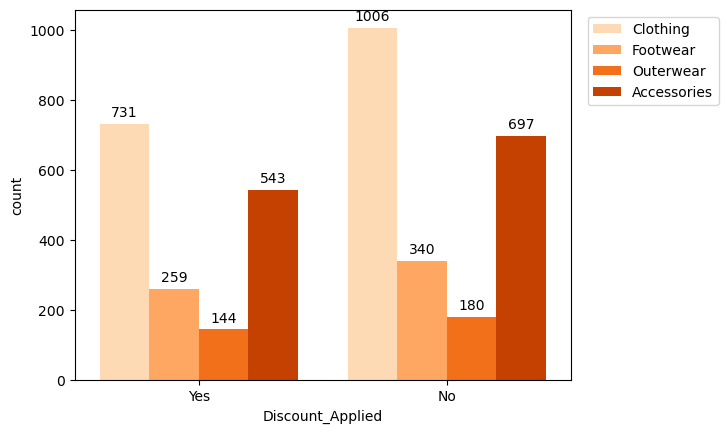

In [1361]:
ax = sns.countplot(
    data = df_shopping
    , x = 'Discount_Applied'
    , hue = 'Category'
    , saturation = 1.0
    , palette = 'Oranges'
)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
    
plt.show()

### Each Categorical Variable vs. Target

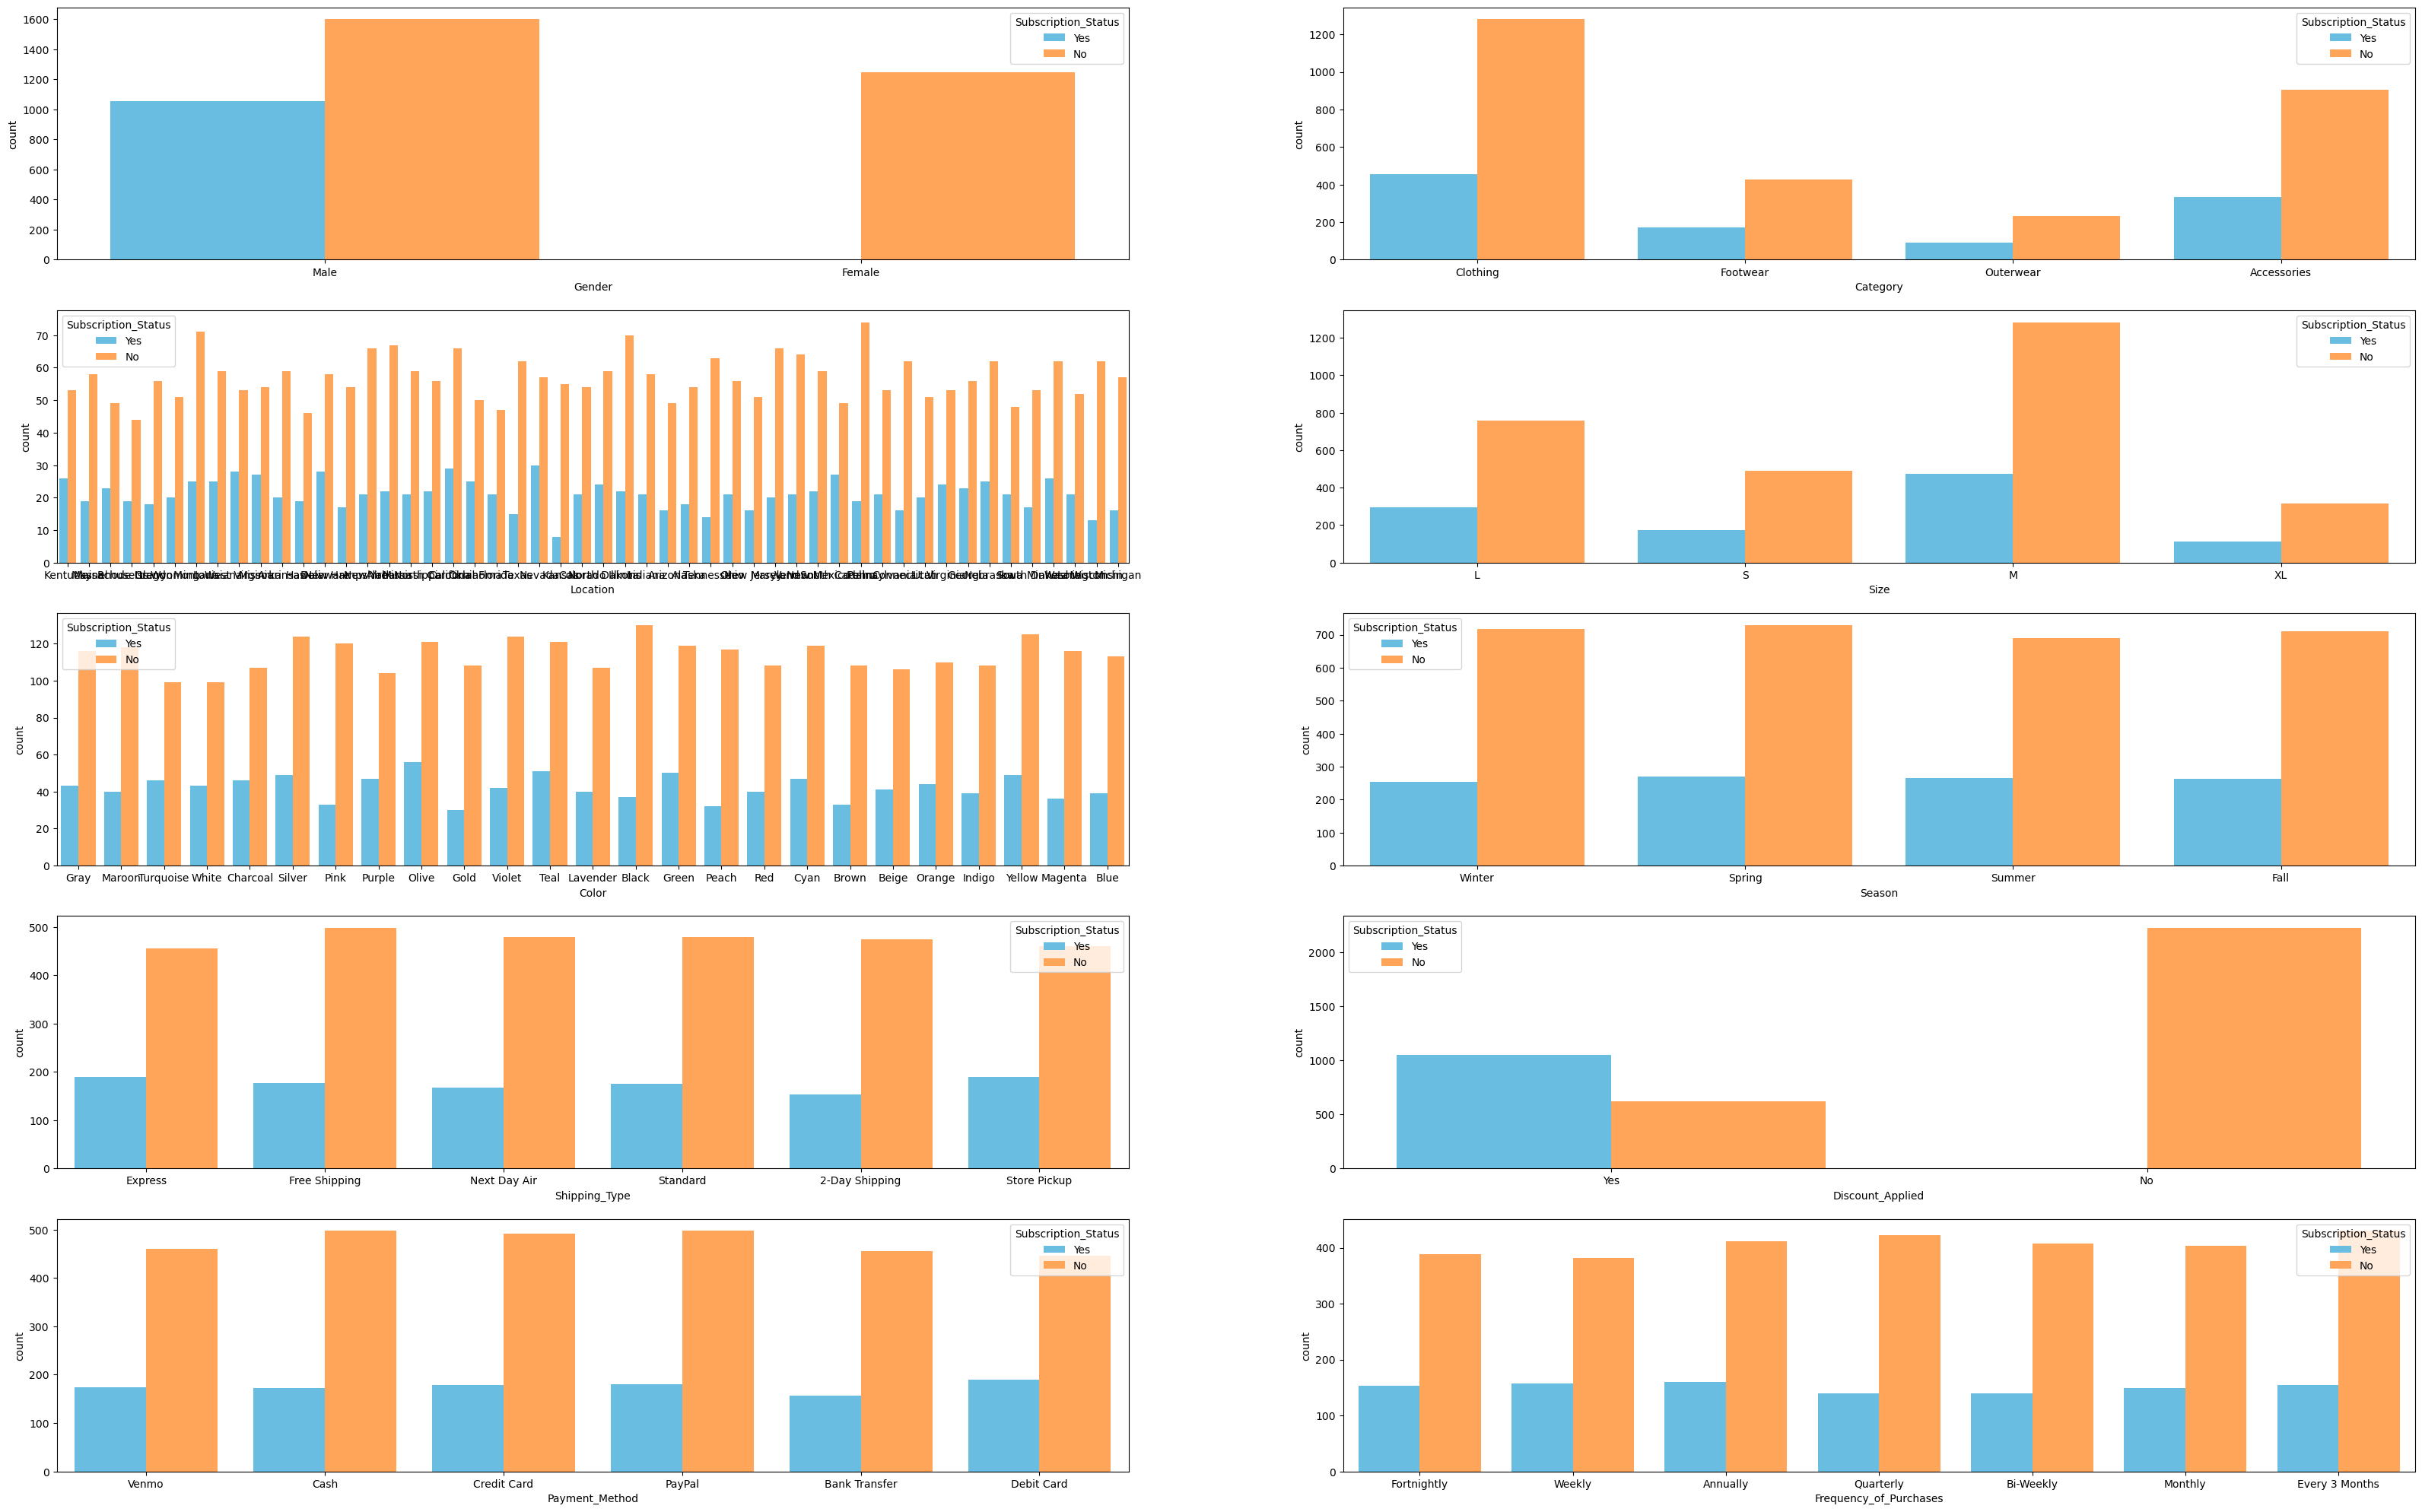

In [1362]:
fig, axs = plt.subplots(5, 2, figsize=(40,25))
sns.countplot(
    data = df_shopping
    , x = 'Gender'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[0, 0]  
)
sns.countplot(
    data = df_shopping
    , x = 'Category'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[0, 1]  
)
sns.countplot(
    data = df_shopping
    , x = 'Location'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[1, 0]  
)
sns.countplot(
    data = df_shopping
    , x = 'Size'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[1, 1]  
)
sns.countplot(
    data = df_shopping
    , x = 'Color'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[2, 0]  
)
sns.countplot(
    data = df_shopping
    , x = 'Season'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[2, 1]  
)
sns.countplot(
    data = df_shopping
    , x = 'Shipping_Type'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[3, 0]  
)
sns.countplot(
    data = df_shopping
    , x = 'Discount_Applied'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[3, 1]  
)
sns.countplot(
    data = df_shopping
    , x = 'Payment_Method'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[4, 0]  
)
sns.countplot(
    data = df_shopping
    , x = 'Frequency_of_Purchases'
    , hue = target_col
    , palette = custom_palette
    , saturation = 1.0
    , ax=axs[4, 1]  
)
plt.show()


Overall, non-subscribers always outnumber subscribers. But notably:

- Female customers never subscribe, while male customers do show some subscription.

- When there are large discounts, customers tend to subscribe more; with no discount, customers never subscribe.

## Num + Cat

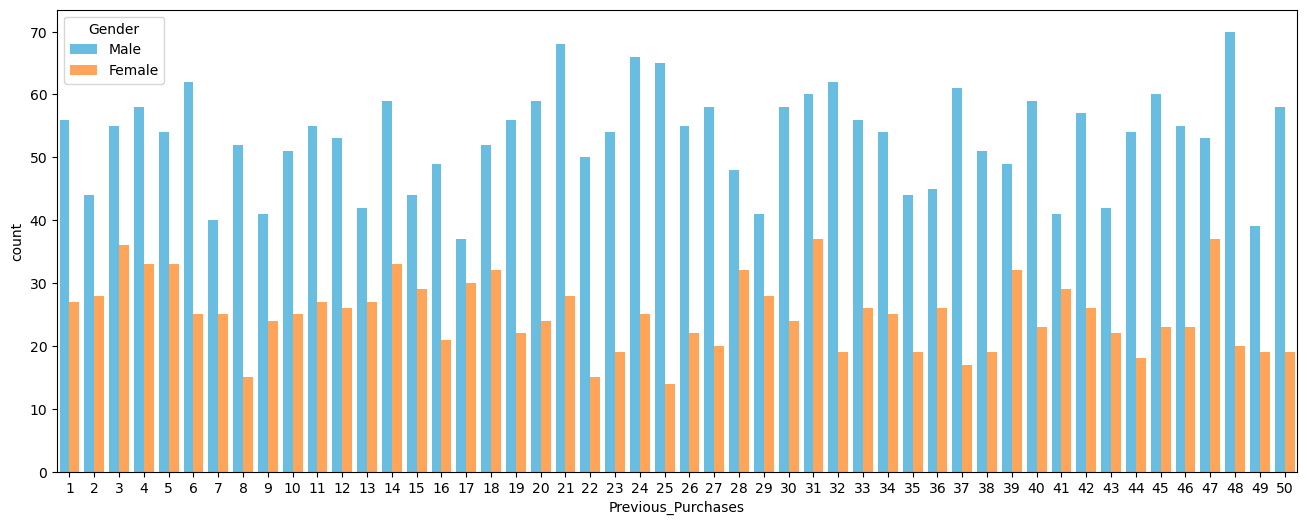

In [1363]:
plt.figure(figsize = (16, 6))
sns.countplot(
    data = df_shopping
    , x = 'Previous_Purchases'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
)
plt.show()

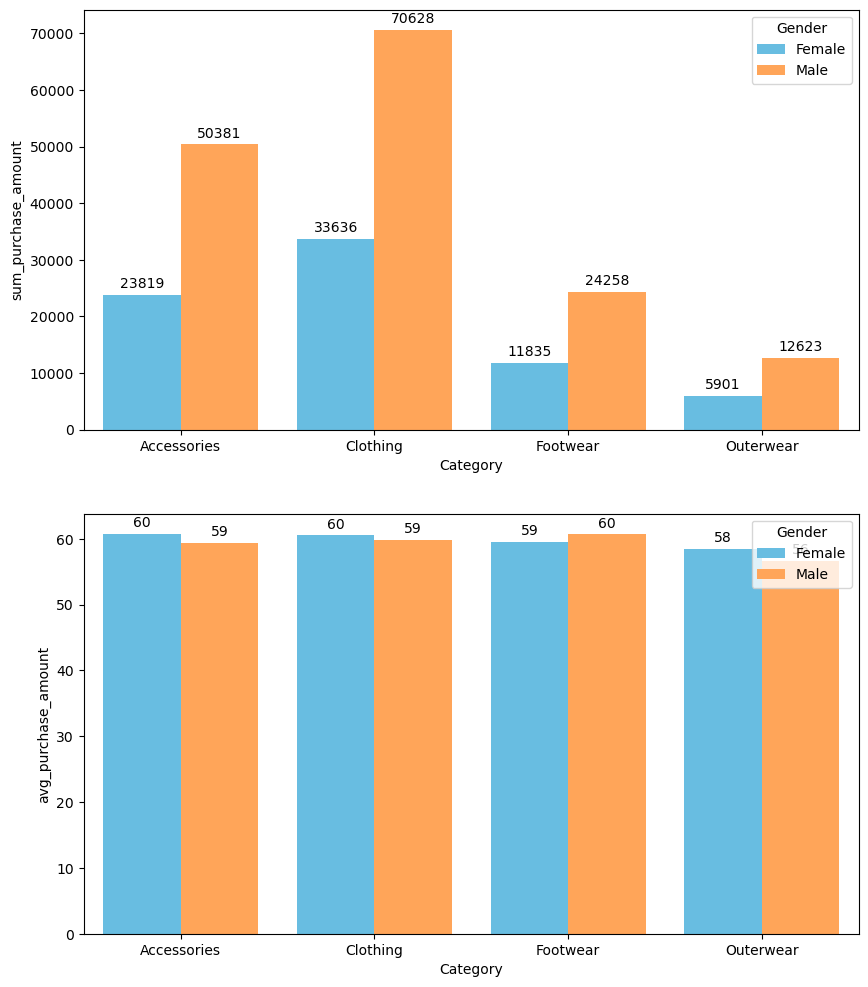

In [1364]:
sum_avg_purchase_amount = df_shopping.groupby(['Category', 'Gender'])['Purchase_Amount_(USD)'].agg(
    sum_purchase_amount = 'sum'
    , avg_purchase_amount = 'mean'
).reset_index()

fig, axs = plt.subplots(2, 1, figsize = (10, 12))

sns.barplot(
    data = sum_avg_purchase_amount
    , x = 'Category'
    , y = 'sum_purchase_amount'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
    , ax = axs[0]
)

sns.barplot(
    data = sum_avg_purchase_amount
    , x = 'Category'
    , y = 'avg_purchase_amount'
    , hue = 'Gender'
    , palette = custom_palette
    , saturation = 1.0
    , ax = axs[1]
)

for ax in axs.flatten():
    for container in ax.containers:
        ax.bar_label(container, padding = 3, fmt = '%d')
        
plt.show()

- Although female customers have a higher average order value than males in every product category, the total order value from male customers is nearly twice that of females. This is because:

    - There are more male customers than female

    - Male customers make repeat purchases more often than female

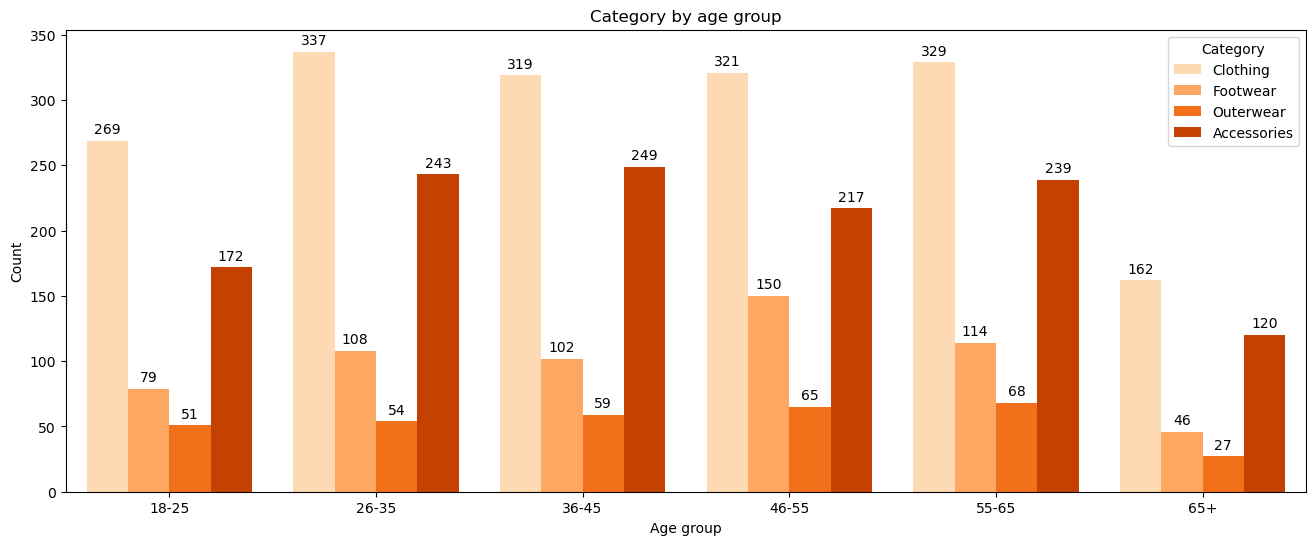

In [1365]:
plt.figure(figsize = (16, 6))

ax = sns.countplot(
    data = df_shopping
    , x = df_shopping['age_bin']
    , hue = 'Category'
    , palette = 'Oranges'
    , saturation = 1.0
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.xlabel("Age group")
plt.ylabel("Count")    
plt.title("Category by age group")
plt.show()

Summary

1. Subscription Information

- Most customers do not subscribe (73% non-subscribers vs. 27% subscribers).

- Female customers never subscribe, while some male customers do.

- Subscription rates go up when products are discounted; with no discount, no one subscribes.

2. Customer Characteristics

- The majority are middle-aged and older.

    - These groups spend more than younger customers.

    - They also make repeat purchases more often.

- Customers tend to buy items priced either mid-range (20–40 USD) or high-end (90–100 USD).

- Clothing is the most purchased category.

- Free shipping is the most chosen delivery option.

3. Gender Differences

- Most customers are male (68%).

- Male customers shop about once every three months; female customers shop about twice a week.

- Male customers only buy when there is a discount; female customers more often buy full-price items.

- Male customers prefer shopping in spring; female customers prefer autumn.

- Although female customers have a higher average order value in every category, the total order value from male customers is nearly double that of females, because:

    - There are more male customers overall.

    - Male customers make repeat purchases more frequently.

4. Customer Satisfaction

- Ratings show customers are quite satisfied with their purchases. As a result, all customers make at least one repeat purchase.

# Feature Engineering

In [1366]:
X = df_shopping.drop(columns = [target_col])
y = df_shopping[target_col]
X.shape, y.shape

((3900, 18), (3900,))

In [1367]:
X

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases,age_bin,rating_bin
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo,Fortnightly,46-55,Good experience
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash,Fortnightly,18-25,Good experience
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55,Good experience
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25,Good experience
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal,Annually,36-45,Fair experience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,No,No,32,Venmo,Weekly,36-45,Excellent experience
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,46-55,Excellent experience
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,No,No,24,Venmo,Quarterly,46-55,Fair experience
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,No,No,24,Venmo,Weekly,36-45,Good experience


In [1368]:
X.isna().sum()

Age                       0
Gender                    0
Item_Purchased            0
Category                  0
Purchase_Amount_(USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment_Method            0
Frequency_of_Purchases    0
age_bin                   0
rating_bin                0
dtype: int64

In [1369]:
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
3895     No
3896     No
3897     No
3898     No
3899     No
Name: Subscription_Status, Length: 3900, dtype: object

In [1370]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)
y = y_encoded

[1 1 1 ... 0 0 0]


In [1371]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

# Split data

In [1372]:
sss = StratifiedShuffleSplit(
    n_splits = 1       
    , test_size = 0.3
    , train_size = None
    , random_state = 42    
)
for train, test in sss.split(X, y):
    X_train = X.iloc[train] 
    y_train = y[train]
    X_test = X.iloc[test]
    y_test = y[test]

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (2730, 18) (2730,)
Test size: (1170, 18) (1170,)


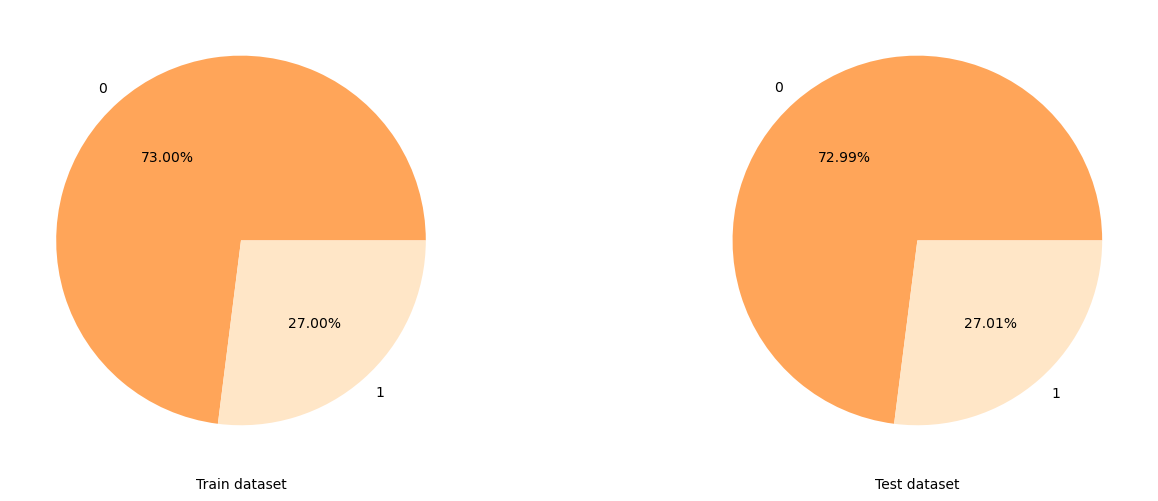

In [1373]:
fig, axs = plt.subplots(1,2, figsize = (16,6))

pd.Series(y_train).value_counts().plot(
    kind = 'pie'
    , autopct = '%.2f%%'
    , ax = axs[0]
    , colors = ['#FFA559', '#FFE6C7']
    )
pd.Series(y_test).value_counts().plot(
    kind = 'pie'
    , autopct = '%.2f%%'
    , ax = axs[1]
    , colors = ['#FFA559', '#FFE6C7']
    )

axs[0].set_xlabel('Train dataset')
axs[1].set_xlabel('Test dataset')
plt.show()

# Pipeline

In [1374]:
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE

In [1375]:
categorical_encode = OneHotEncoder(
    handle_unknown='ignore'
    , sparse=False
)

numerical_pipe = Pipeline([
    ('standardscaler', StandardScaler())
])

preprocessing = ColumnTransformer(
    [ 
        ("cat", categorical_encode, cat_col)
        , ("num", numerical_pipe, num_col)
    ]
)

pipeline = Pipeline(
    [
        ('preprocessing', preprocessing)
        , ('smote', SMOTE(
            sampling_strategy = 0.8
            , random_state = 42
        ))
    ]
)

pipeline.fit(X_train, y_train)
X_train_tf = preprocessing.transform(X_train)
X_test_tf = preprocessing.transform(X_test)

set_config(display='diagram')

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Item_Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Shipping_Type',
                                                   'Discount_Applied',
                                                   'Promo_Code_Used',
                                                   'Payment_Method',
                                                   'Frequency_of_Purchases']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase_Amount_(USD)',
                                                   'Review_Rating',
                                                   'Previous_Purchases'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.8))])

In [1376]:
X_res, y_res = pipeline.fit_resample(X_train, y_train)

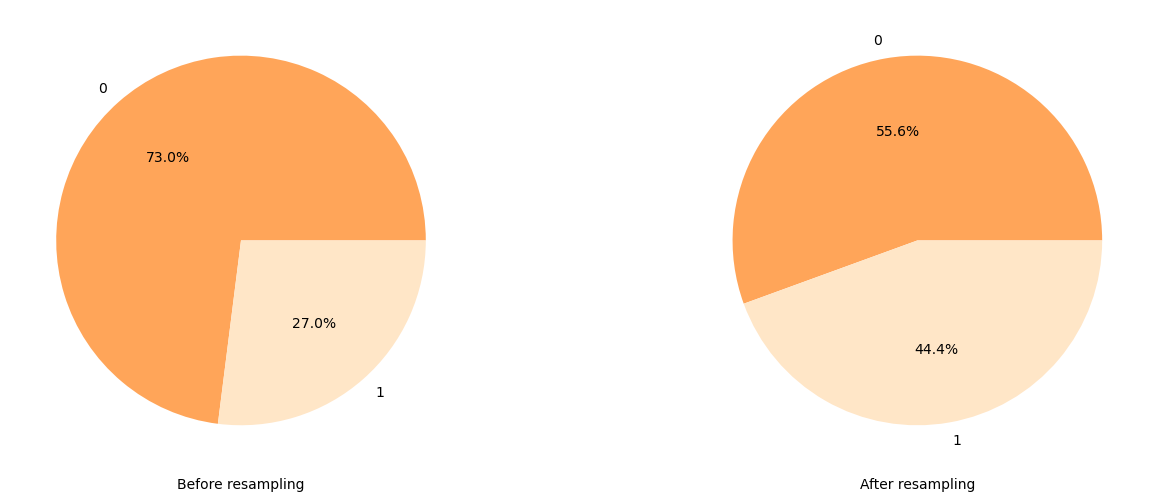

In [1377]:
fig, axs = plt.subplots(1,2, figsize = (16,6))
pd.Series(y_train).value_counts().plot(
    kind = 'pie'
    , autopct = '%.1f%%'
    , ax = axs[0]
    , colors = ['#FFA559', '#FFE6C7']
    )
pd.Series(y_res).value_counts().plot(
    kind = 'pie'
    , autopct = '%.1f%%'
    , ax = axs[1]
    , colors = ['#FFA559', '#FFE6C7']
    )

axs[0].set_xlabel("Before resampling")
axs[1].set_xlabel("After resampling")
plt.show()

# Model

## Logistic Regression

In [1378]:
def report_performance(exp_name, y_test, y_scores):
    y_prob = y_scores[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = sk_auc(fpr, tpr)
    gini = 2 * roc_auc - 1

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve of {exp_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"AUC: {roc_auc:.3f}")
    print(f"Gini Coefficient: {gini:.3f}")

    df_rank = pd.DataFrame({
    'label': y_test,
    'score': y_prob
    })

    ax = sns.kdeplot(data=df_rank, x='score', hue='label', common_norm=True, multiple="fill",)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

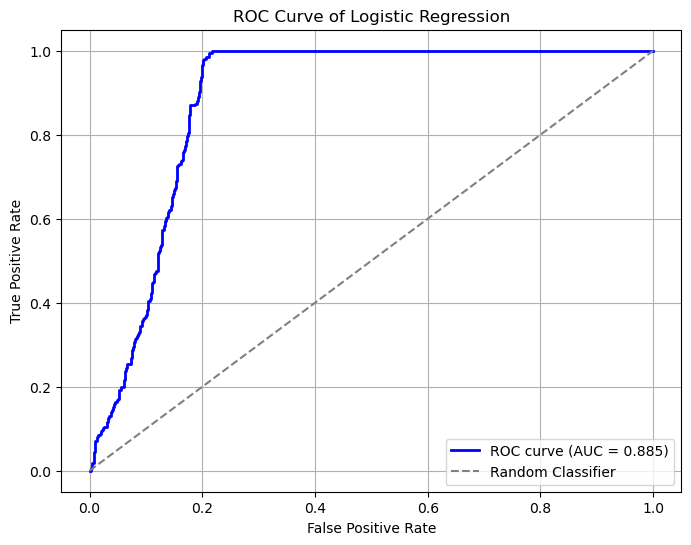

AUC: 0.885
Gini Coefficient: 0.770


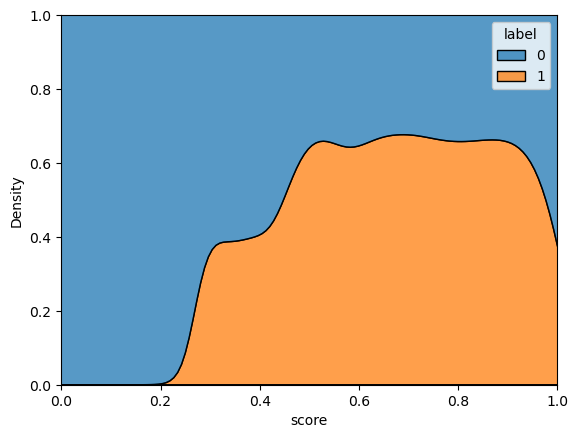

In [ ]:
logis_model = LogisticRegression()
logis_model.fit(X_res, y_res)
y_pred = logis_model.predict(X_test_tf)
y_prob = logis_model.predict_proba(X_test_tf)
report_performance('Logistic Regression', y_test, y_prob)

In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc:.2f}')
print(f'Precision: {pre:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}')

Accuracy: 0.84
Precision: 0.64, Recall: 0.97, F1-score: 0.77


## XGBoostClasifier

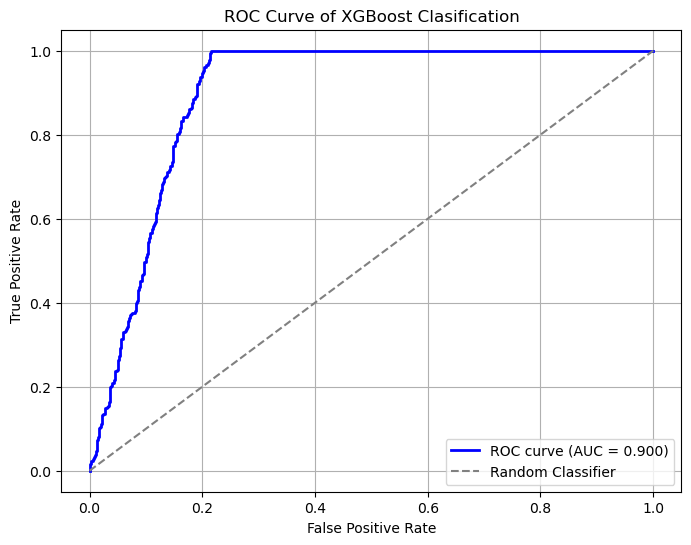

AUC: 0.900
Gini Coefficient: 0.799


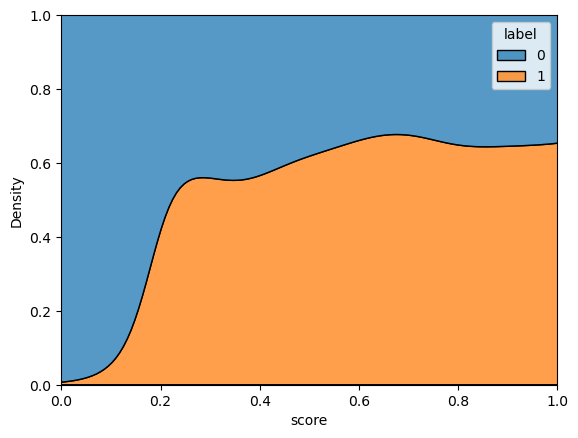

In [1393]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
xg_y_pred = xgb_model.predict(X_test_tf)
xg_y_prob = xgb_model.predict_proba(X_test_tf)
report_performance('XGBoost Clasification', y_test, y_test_prob)

In [1394]:
acc = accuracy_score(y_test, xg_y_pred)
pre = precision_score(y_test, xg_y_pred)
rec = recall_score(y_test, xg_y_pred)
f1 = f1_score(y_test, xg_y_pred)

print(f'Accuracy: {acc:.2f}')
print(f'Precision: {pre:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}')

Accuracy: 0.82
Precision: 0.65, Recall: 0.73, F1-score: 0.69


# Cross Validation

In [1395]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [1396]:
kfold = StratifiedKFold(n_splits=5) 
means=[]
auc_scores=[]
stds=[]

classifiers=['Logistic', 'XGBoost']
models=[
    LogisticRegression(),
    XGBClassifier()
]

for model in models:
    pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('model', model)])
    cv_result = cross_val_score(pipeline, X,y, cv = kfold,scoring = "roc_auc")
    means.append(cv_result.mean())
    stds.append(cv_result.std())
    auc_scores.append(cv_result)
    
models_dataframe=pd.DataFrame({'CV Mean':means,'Std':stds, 'Test': auc_scores},index=classifiers)       
models_dataframe.sort_values(by='CV Mean',  ascending=False)

,CV Mean,Std,Test
XGBoost,0.887359,0.201004,"[0.48721878409781855, 0.949916291156848, 1.0, 1.0, 0.9996574770258981]"
Logistic,0.886844,0.201399,"[0.4860526907603761, 0.9481671511506843, 1.0, 1.0, 1.0]"


------------------------

# Improve model performance (pending...)

In [1384]:
feature_names = preprocessing.get_feature_names_out()
coefficients = logis_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature':feature_names
    , 'Coefficient':coefficients
    , 'Absolute':np.abs(coefficients)
})
feature_importance.sort_values(by='Coefficient', ascending=False).head(30)

,Feature,Coefficient,Absolute
123,cat__Promo_Code_Used_Yes,1.963274,1.963274
121,cat__Discount_Applied_Yes,1.963274,1.963274
36,cat__Location_Colorado,1.093575,1.093575
38,cat__Location_Delaware,1.033461,1.033461
56,cat__Location_Montana,0.953684,0.953684
20,cat__Item_Purchased_Shorts,0.670090,0.670090
33,cat__Location_Arizona,0.659029,0.659029
55,cat__Location_Missouri,0.649674,0.649674
47,cat__Location_Kentucky,0.629942,0.629942
39,cat__Location_Florida,0.601032,0.601032


In [1385]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(logis_model, X_test_tf, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
perm_importance_df.sort_values(by='Importance Mean', ascending=False).head(30)

,Feature,Importance Mean,Importance Std
120,cat__Discount_Applied_No,0.055641,0.007297
122,cat__Promo_Code_Used_No,0.055641,0.007297
121,cat__Discount_Applied_Yes,0.055385,0.007128
123,cat__Promo_Code_Used_Yes,0.055385,0.007128
1,cat__Gender_Male,0.006439,0.002892
0,cat__Gender_Female,0.006439,0.002892
83,cat__Size_S,0.004131,0.001739
135,cat__Frequency_of_Purchases_Quarterly,0.003048,0.001425
113,cat__Season_Winter,0.002707,0.001638
79,cat__Location_Wisconsin,0.002678,0.001141
